In [55]:
from games.mp import MP
from games.blotto import Blotto
from games.rps import RPS

from agents.fictitiousplay import FictitiousPlay
from agents.random_agent import RandomAgent
from agents.regretmatching import RegretMatching

import matplotlib.pyplot as plt
from collections import Counter
from collections import defaultdict

import seaborn as sns
import pandas as pd

import subprocess

In [56]:
def export_notebook_to_html(notebook_path, output_path):
    command = [
        "python", "-m", "jupyter", "nbconvert",
        "--to", "html",
        notebook_path,
        "--output", output_path
    ]
    subprocess.run(command, check=True)

## Combinaciones válidas:
* FictitiousPlay vs RandomAgent

* FictitiousPlay vs RegretMatching

* RandomAgent vs RegretMatching

# __N-form Games__

In [57]:
EPISODES = 100000

---

# __Matching Pennis__

In [58]:
g = MP()

In [59]:
def plot_policies(defined_agents, agent_names, game):
    for agent in game.agents:
        if hasattr(defined_agents[agent], "policy"):
            policy = defined_agents[agent].policy()
            labels = [game._moves[i] if hasattr(game, "_moves") else i for i in range(len(policy))]

            plt.figure()
            plt.bar(labels, policy)
            plt.title(f"Política aprendida - {agent_names[agent]}")
            plt.xlabel("Acciones")
            plt.ylabel("Probabilidad")
            plt.tight_layout()
            plt.grid(True)
            plt.show()

def plot_total_rewards(total_rewards, agent_names):
    plt.figure()
    agents = list(total_rewards.keys())
    rewards = [total_rewards[agent] for agent in agents]
    names = [agent_names[agent] for agent in agents]

    plt.bar(names, rewards)
    plt.title("Recompensa acumulada en test")
    plt.ylabel("Recompensa total")
    plt.tight_layout()
    plt.show()

def plot_test_action_distribution(action_history, agent_names, game):
    for agent, actions in action_history.items():
        counts = Counter(actions)
        labels = [game._moves[a] if hasattr(game, "_moves") else a for a in counts.keys()]
        
        plt.figure()
        plt.bar(labels, counts.values())
        plt.title(f"Distribución de acciones - {agent_names[agent]}")
        plt.xlabel("Acciones")
        plt.ylabel("Frecuencia")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

def plot_reward_evolution(reward_history, agent_names):
    plt.figure(figsize=(10, 5))
    for agent, rewards in reward_history.items():
        plt.plot(rewards, label=agent_names[agent])
    plt.title("Evolución de recompensa acumulada por episodio")
    plt.xlabel("Episodio")
    plt.ylabel("Recompensa acumulada")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [60]:
def train_agents(game, agent0, agent1, episodes=EPISODES):
    game.reset()

    defined_agents = {
        "agent_0": agent0,
        "agent_1": agent1
    }

    agent_names = {
        "agent_0": type(agent0).__name__,
        "agent_1": type(agent1).__name__
    }

    for _ in range(episodes):
        actions = {agent: defined_agents[agent].action() for agent in game.agents}
        game.step(actions)

    return defined_agents, agent_names

def test_agents(game, defined_agents, agent_names, rounds=10):
    print("\nJuegos posteriores al entrenamiento:")
    action_history = {agent: [] for agent in game.agents}
    total_rewards = {agent: 0 for agent in game.agents}
    reward_history = {agent: [] for agent in game.agents}  

    for i in range(rounds):
        game.reset()
        actions = {agent: defined_agents[agent].action() for agent in game.agents}
        obs, rewards, terminations, truncations, infos = game.step(actions)

        print(f"\nJuego {i + 1}:")
        for agent in game.agents:
            action_idx = actions[agent]
            move = game._moves[action_idx] if hasattr(game, "_moves") else action_idx
            print(f"{agent_names[agent]} ({agent}) eligió: {move} | Recompensa: {rewards[agent]}")
            action_history[agent].append(action_idx)
            total_rewards[agent] += rewards[agent]
            reward_history[agent].append(total_rewards[agent])  

    # Gráficos
    plot_test_action_distribution(action_history, agent_names, game)
    plot_total_rewards(total_rewards, agent_names)
    plot_reward_evolution(reward_history, agent_names)  
    plot_policies(defined_agents, agent_names, game)


__FictiiousPlay VS RandomAgent__


Juegos posteriores al entrenamiento:

Juego 1:
FictitiousPlay (agent_0) eligió: T | Recompensa: -1.0
RandomAgent (agent_1) eligió: H | Recompensa: 1.0

Juego 2:
FictitiousPlay (agent_0) eligió: T | Recompensa: 1.0
RandomAgent (agent_1) eligió: T | Recompensa: -1.0

Juego 3:
FictitiousPlay (agent_0) eligió: T | Recompensa: -1.0
RandomAgent (agent_1) eligió: H | Recompensa: 1.0

Juego 4:
FictitiousPlay (agent_0) eligió: T | Recompensa: 1.0
RandomAgent (agent_1) eligió: T | Recompensa: -1.0

Juego 5:
FictitiousPlay (agent_0) eligió: T | Recompensa: 1.0
RandomAgent (agent_1) eligió: T | Recompensa: -1.0

Juego 6:
FictitiousPlay (agent_0) eligió: T | Recompensa: 1.0
RandomAgent (agent_1) eligió: T | Recompensa: -1.0

Juego 7:
FictitiousPlay (agent_0) eligió: T | Recompensa: 1.0
RandomAgent (agent_1) eligió: T | Recompensa: -1.0

Juego 8:
FictitiousPlay (agent_0) eligió: T | Recompensa: -1.0
RandomAgent (agent_1) eligió: H | Recompensa: 1.0

Juego 9:
FictitiousPlay (agent_0) eligió: T | Rec

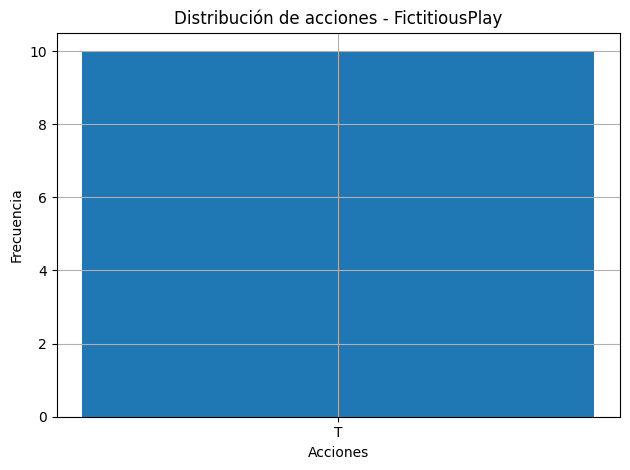

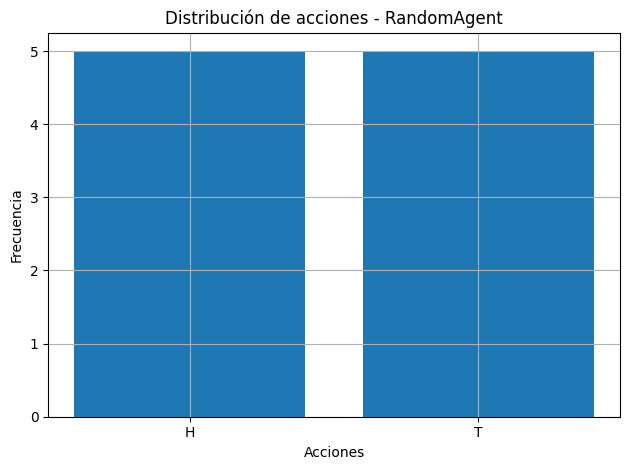

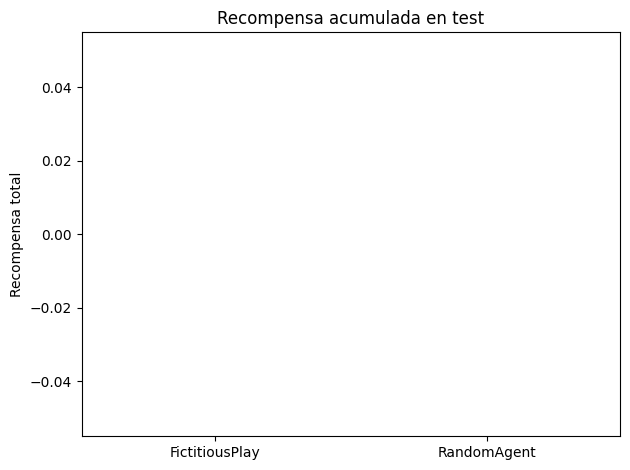

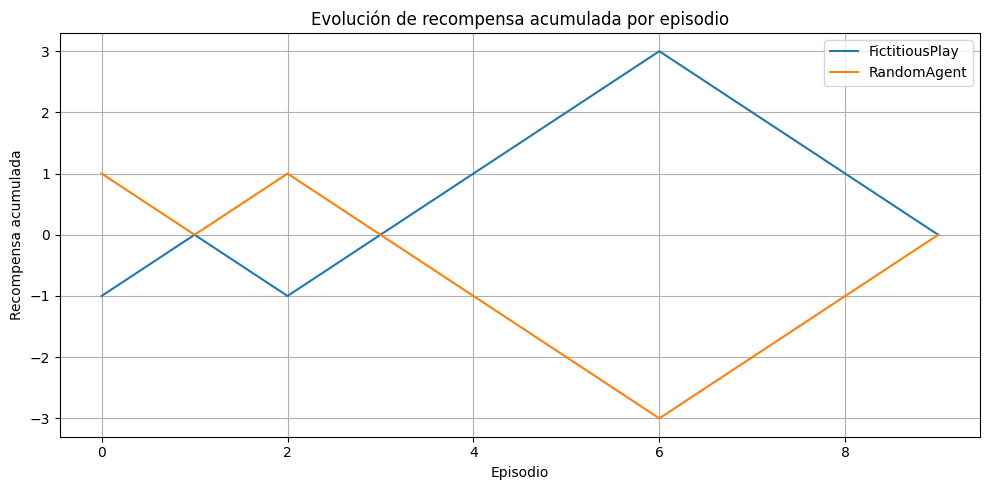

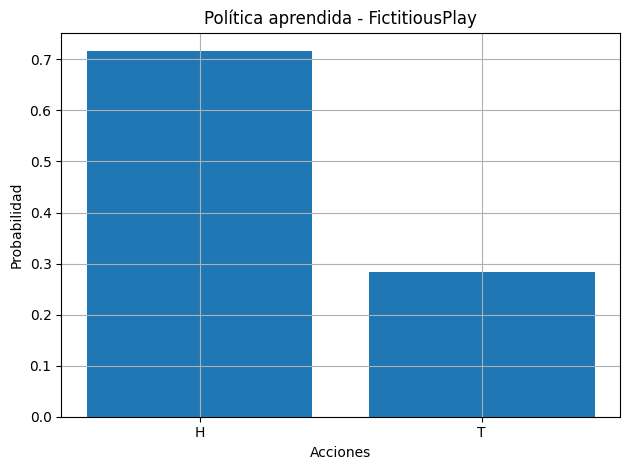

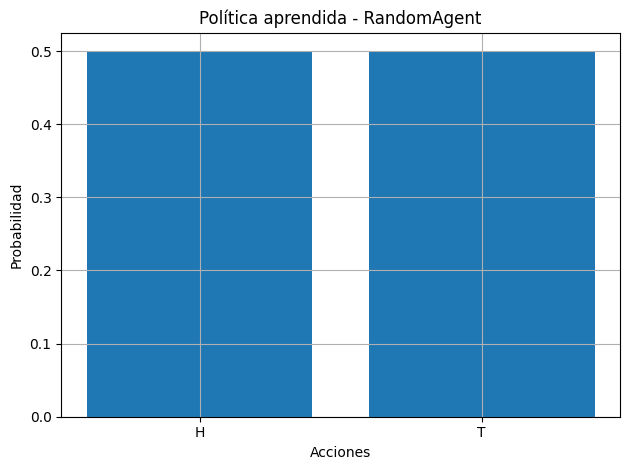

In [61]:
g.reset()

agent0 = FictitiousPlay(game=g, agent="agent_0")
agent1 = RandomAgent(game=g, agent="agent_1")

defined_agents, agent_names = train_agents(g, agent0, agent1, episodes=EPISODES)

# Opcional: congelar aprendizaje
defined_agents["agent_0"].learn = False

# Test
test_agents(g, defined_agents, agent_names, rounds=10)

__FictitiousPlay vs RegretMatching__


Juegos posteriores al entrenamiento:

Juego 1:
FictitiousPlay (agent_0) eligió: T | Recompensa: -1.0
RegretMatching (agent_1) eligió: H | Recompensa: 1.0

Juego 2:
FictitiousPlay (agent_0) eligió: T | Recompensa: 1.0
RegretMatching (agent_1) eligió: T | Recompensa: -1.0

Juego 3:
FictitiousPlay (agent_0) eligió: T | Recompensa: 1.0
RegretMatching (agent_1) eligió: T | Recompensa: -1.0

Juego 4:
FictitiousPlay (agent_0) eligió: T | Recompensa: -1.0
RegretMatching (agent_1) eligió: H | Recompensa: 1.0

Juego 5:
FictitiousPlay (agent_0) eligió: T | Recompensa: -1.0
RegretMatching (agent_1) eligió: H | Recompensa: 1.0

Juego 6:
FictitiousPlay (agent_0) eligió: T | Recompensa: 1.0
RegretMatching (agent_1) eligió: T | Recompensa: -1.0

Juego 7:
FictitiousPlay (agent_0) eligió: T | Recompensa: 1.0
RegretMatching (agent_1) eligió: T | Recompensa: -1.0

Juego 8:
FictitiousPlay (agent_0) eligió: T | Recompensa: -1.0
RegretMatching (agent_1) eligió: H | Recompensa: 1.0

Juego 9:
FictitiousPlay (

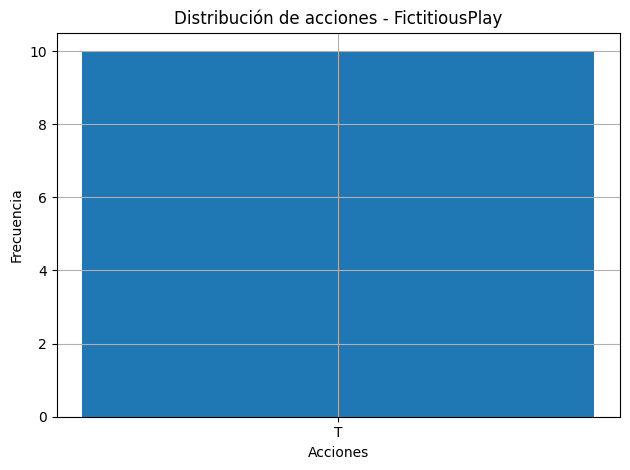

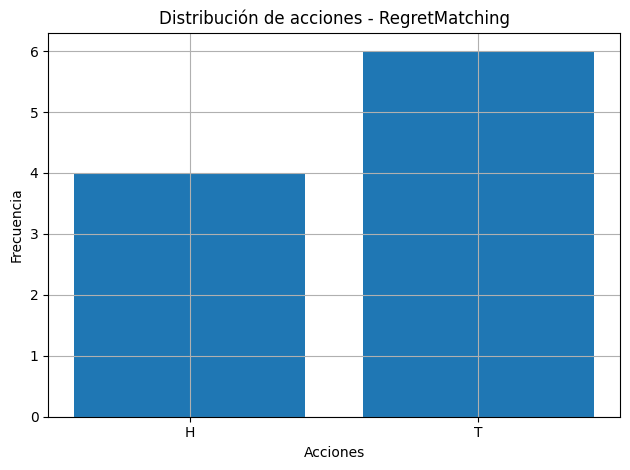

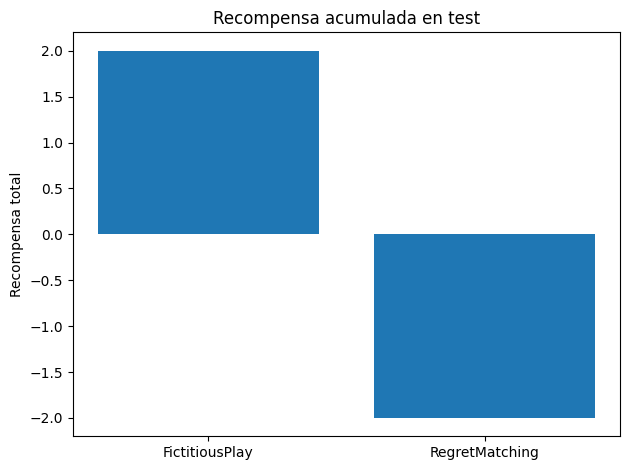

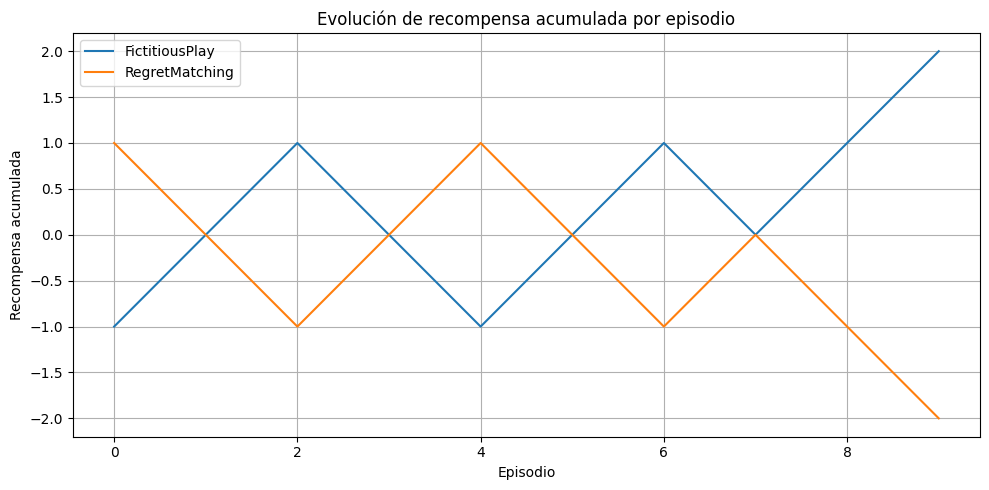

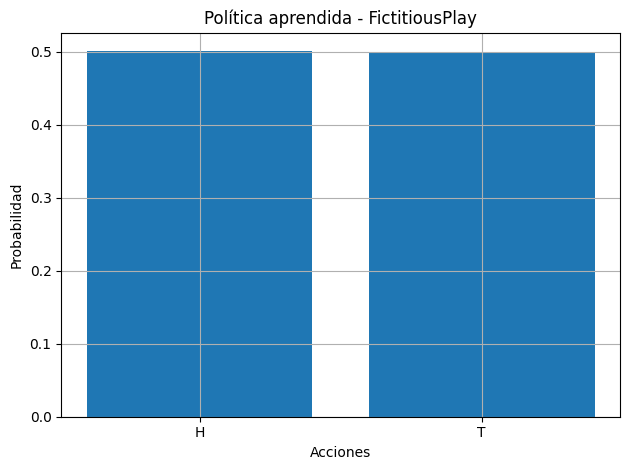

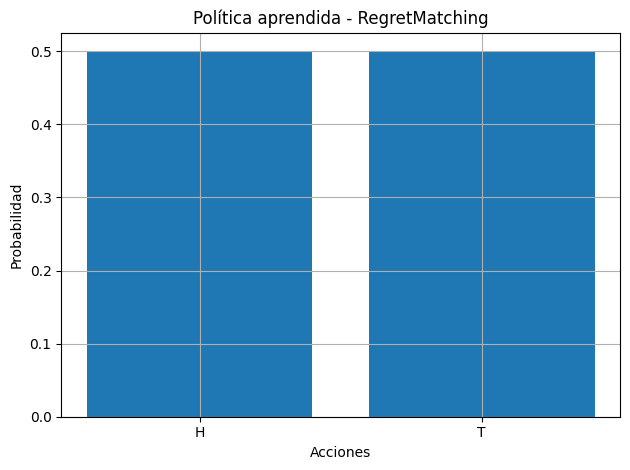

In [62]:
g.reset()

agent0 = FictitiousPlay(game=g, agent="agent_0")
agent1 = RegretMatching(game=g, agent="agent_1")

defined_agents, agent_names = train_agents(g, agent0, agent1, episodes=EPISODES)

# Opcional: congelar aprendizaje
defined_agents["agent_0"].learn = False

# Test
test_agents(g, defined_agents, agent_names, rounds=10)

__RandomAgent vs RegretMatching__


Juegos posteriores al entrenamiento:

Juego 1:
RandomAgent (agent_0) eligió: H | Recompensa: -1.0
RegretMatching (agent_1) eligió: T | Recompensa: 1.0

Juego 2:
RandomAgent (agent_0) eligió: T | Recompensa: 1.0
RegretMatching (agent_1) eligió: T | Recompensa: -1.0

Juego 3:
RandomAgent (agent_0) eligió: T | Recompensa: 1.0
RegretMatching (agent_1) eligió: T | Recompensa: -1.0

Juego 4:
RandomAgent (agent_0) eligió: T | Recompensa: 1.0
RegretMatching (agent_1) eligió: T | Recompensa: -1.0

Juego 5:
RandomAgent (agent_0) eligió: T | Recompensa: 1.0
RegretMatching (agent_1) eligió: T | Recompensa: -1.0

Juego 6:
RandomAgent (agent_0) eligió: H | Recompensa: -1.0
RegretMatching (agent_1) eligió: T | Recompensa: 1.0

Juego 7:
RandomAgent (agent_0) eligió: T | Recompensa: 1.0
RegretMatching (agent_1) eligió: T | Recompensa: -1.0

Juego 8:
RandomAgent (agent_0) eligió: T | Recompensa: 1.0
RegretMatching (agent_1) eligió: T | Recompensa: -1.0

Juego 9:
RandomAgent (agent_0) eligió: T | Recomp

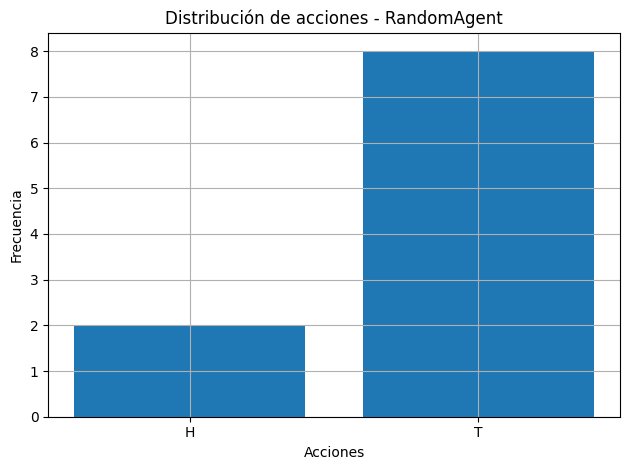

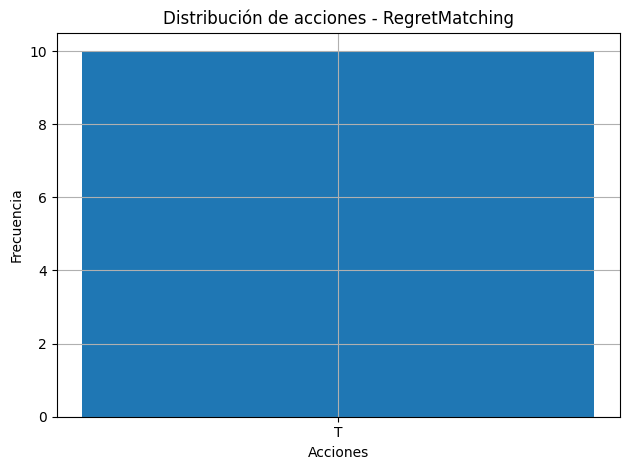

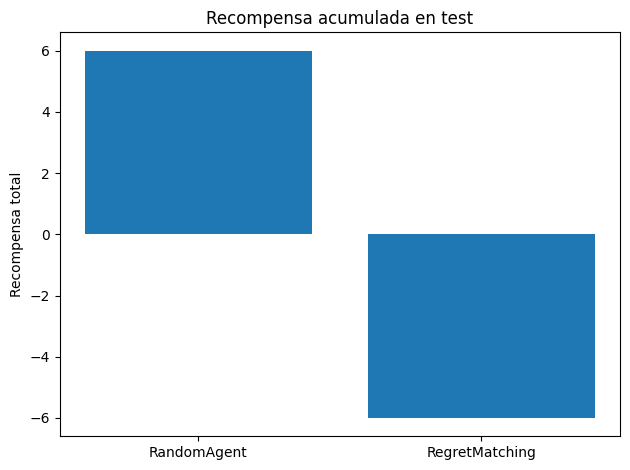

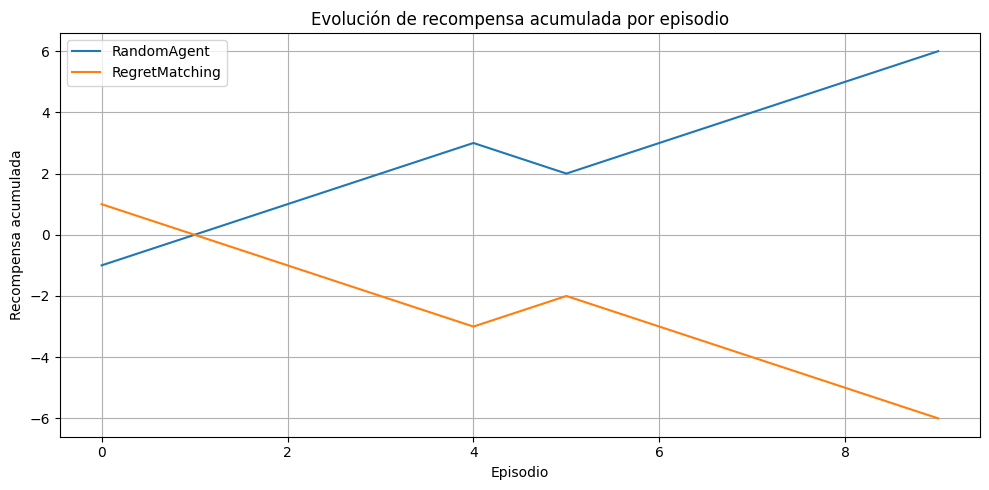

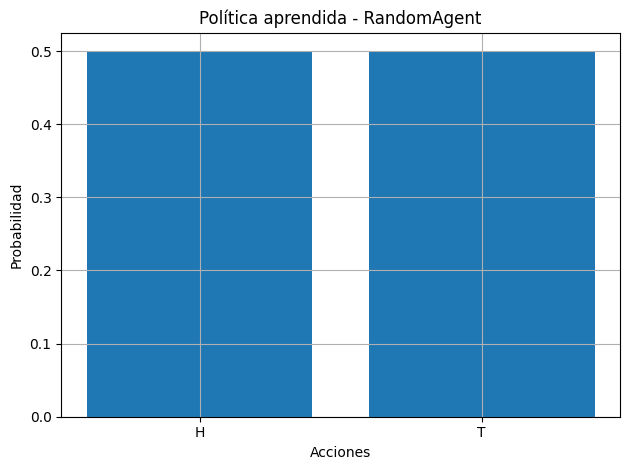

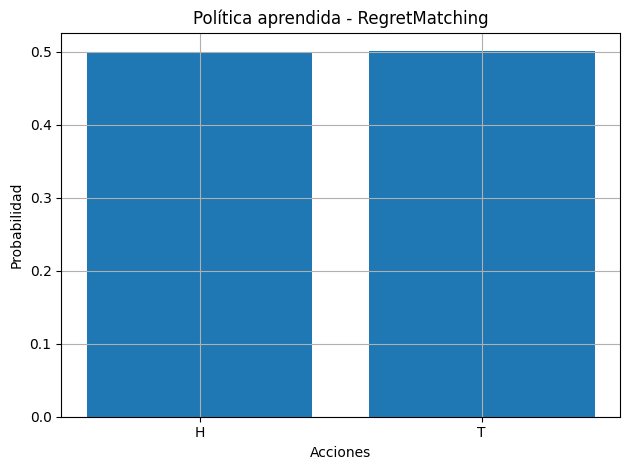

In [63]:
g.reset()

agent0 = RandomAgent(game=g, agent="agent_0")
agent1 = RegretMatching(game=g, agent="agent_1")

defined_agents, agent_names = train_agents(g, agent0, agent1, episodes=EPISODES)

# Opcional: congelar aprendizaje
defined_agents["agent_0"].learn = False

# Test
test_agents(g, defined_agents, agent_names, rounds=10)

---

# __Rock, Paper and Siccors__

In [64]:
g = RPS()

__FictitiousPlay VS RandomAgent__


Juegos posteriores al entrenamiento:

Juego 1:
FictitiousPlay (agent_0) eligió: R | Recompensa: 1.0
RandomAgent (agent_1) eligió: S | Recompensa: -1.0

Juego 2:
FictitiousPlay (agent_0) eligió: R | Recompensa: -1.0
RandomAgent (agent_1) eligió: P | Recompensa: 1.0

Juego 3:
FictitiousPlay (agent_0) eligió: R | Recompensa: -1.0
RandomAgent (agent_1) eligió: P | Recompensa: 1.0

Juego 4:
FictitiousPlay (agent_0) eligió: R | Recompensa: -1.0
RandomAgent (agent_1) eligió: P | Recompensa: 1.0

Juego 5:
FictitiousPlay (agent_0) eligió: R | Recompensa: 1.0
RandomAgent (agent_1) eligió: S | Recompensa: -1.0

Juego 6:
FictitiousPlay (agent_0) eligió: R | Recompensa: 1.0
RandomAgent (agent_1) eligió: S | Recompensa: -1.0

Juego 7:
FictitiousPlay (agent_0) eligió: R | Recompensa: -1.0
RandomAgent (agent_1) eligió: P | Recompensa: 1.0

Juego 8:
FictitiousPlay (agent_0) eligió: R | Recompensa: -1.0
RandomAgent (agent_1) eligió: P | Recompensa: 1.0

Juego 9:
FictitiousPlay (agent_0) eligió: R | Rec

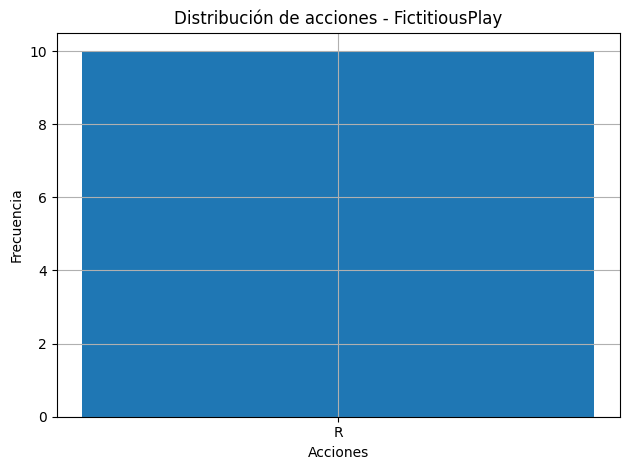

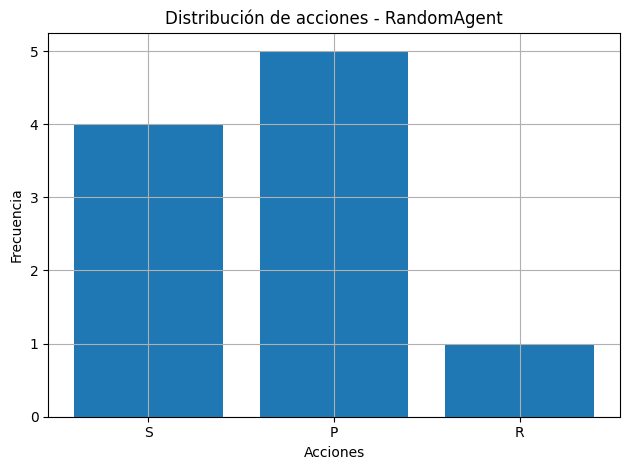

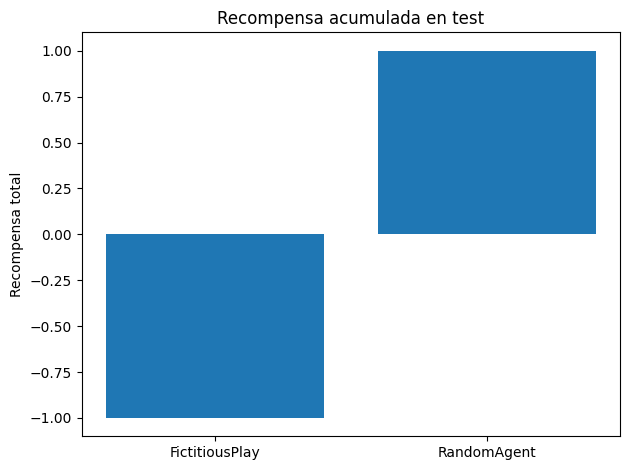

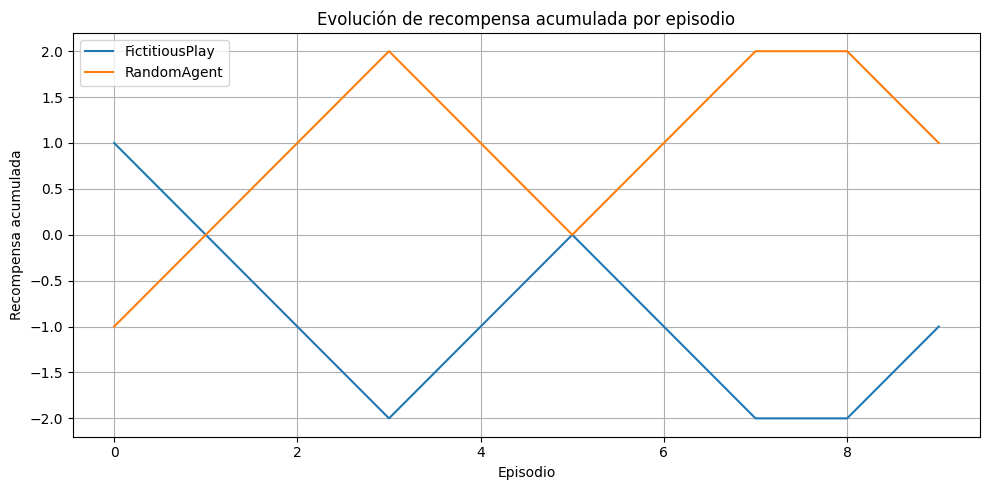

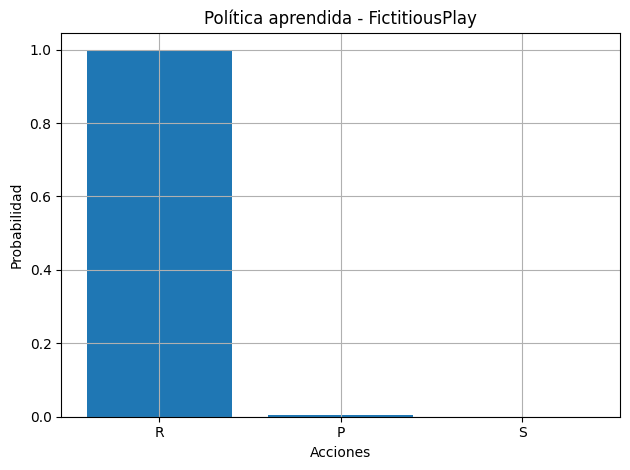

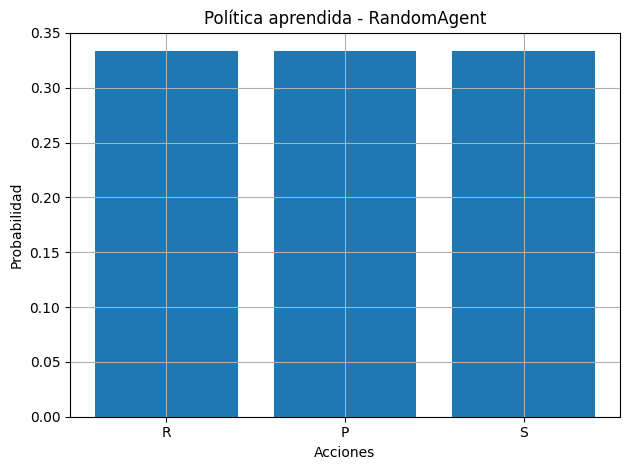

In [65]:
g.reset()

agent0 = FictitiousPlay(game=g, agent="agent_0")
agent1 = RandomAgent(game=g, agent="agent_1")

defined_agents, agent_names = train_agents(g, agent0, agent1, episodes=EPISODES)

# Opcional: congelar aprendizaje
defined_agents["agent_0"].learn = False

# Test
test_agents(g, defined_agents, agent_names, rounds=10)

__FictitiousPlay VS RegretMatching__


Juegos posteriores al entrenamiento:

Juego 1:
FictitiousPlay (agent_0) eligió: S | Recompensa: 1.0
RegretMatching (agent_1) eligió: P | Recompensa: -1.0

Juego 2:
FictitiousPlay (agent_0) eligió: S | Recompensa: 1.0
RegretMatching (agent_1) eligió: P | Recompensa: -1.0

Juego 3:
FictitiousPlay (agent_0) eligió: S | Recompensa: 0.0
RegretMatching (agent_1) eligió: S | Recompensa: -0.0

Juego 4:
FictitiousPlay (agent_0) eligió: S | Recompensa: 1.0
RegretMatching (agent_1) eligió: P | Recompensa: -1.0

Juego 5:
FictitiousPlay (agent_0) eligió: S | Recompensa: -1.0
RegretMatching (agent_1) eligió: R | Recompensa: 1.0

Juego 6:
FictitiousPlay (agent_0) eligió: S | Recompensa: -1.0
RegretMatching (agent_1) eligió: R | Recompensa: 1.0

Juego 7:
FictitiousPlay (agent_0) eligió: S | Recompensa: 0.0
RegretMatching (agent_1) eligió: S | Recompensa: -0.0

Juego 8:
FictitiousPlay (agent_0) eligió: S | Recompensa: 1.0
RegretMatching (agent_1) eligió: P | Recompensa: -1.0

Juego 9:
FictitiousPlay (

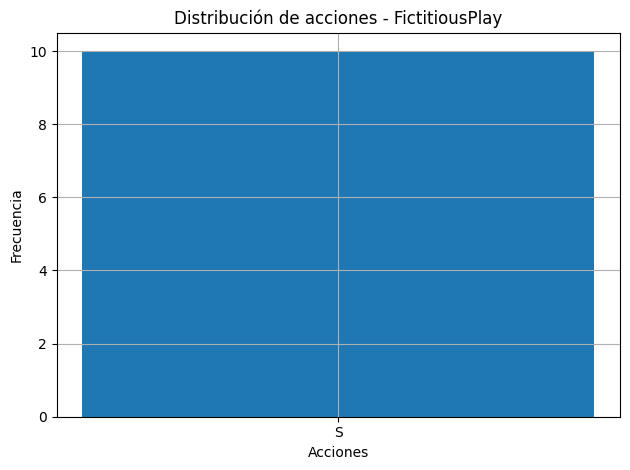

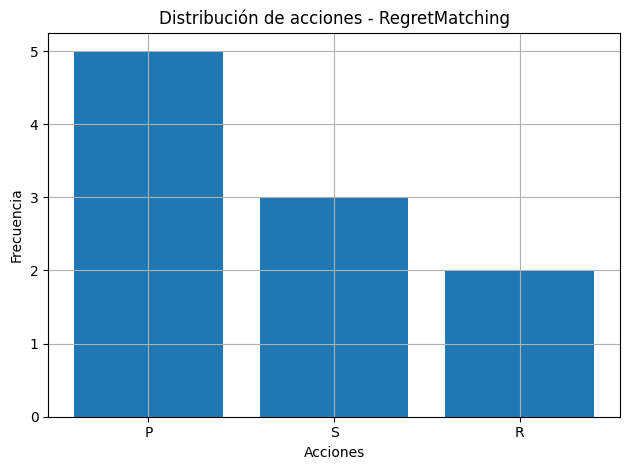

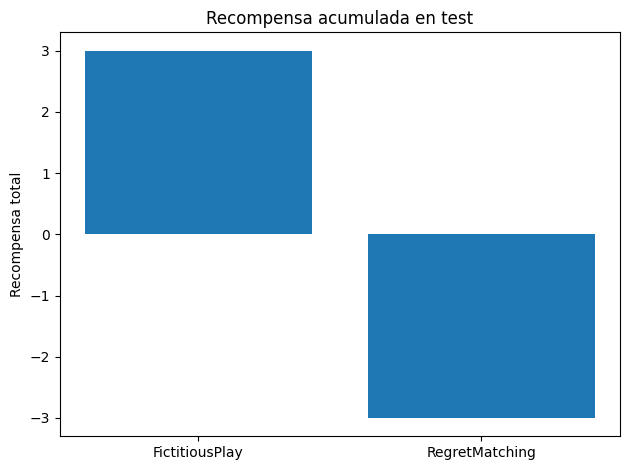

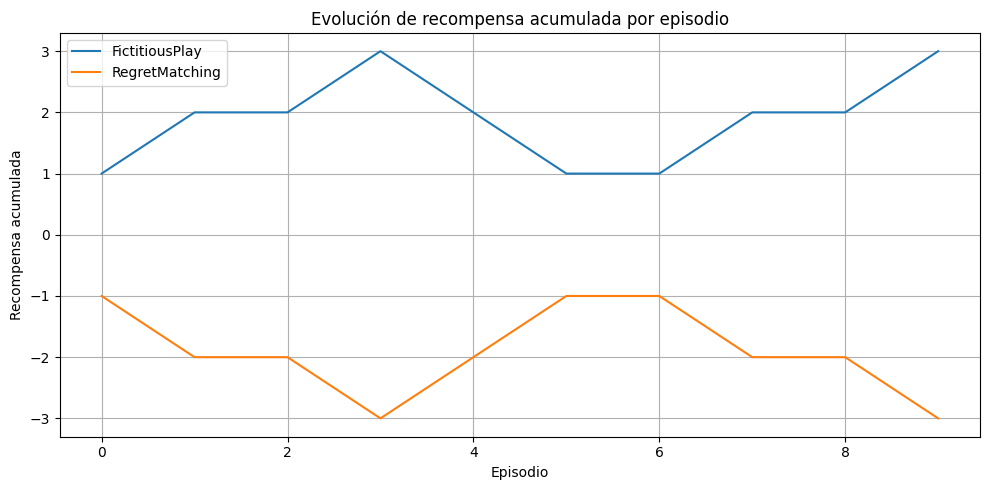

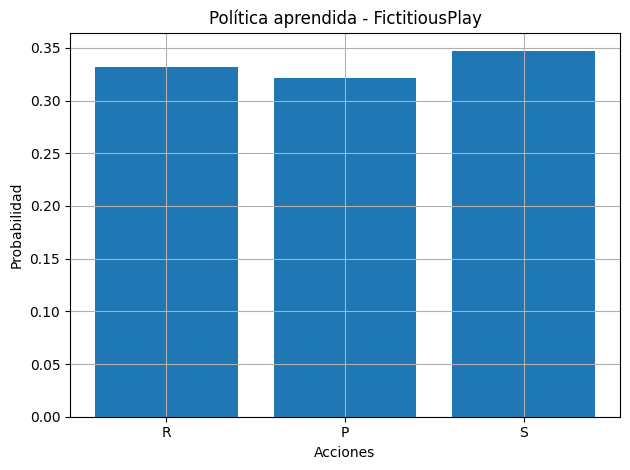

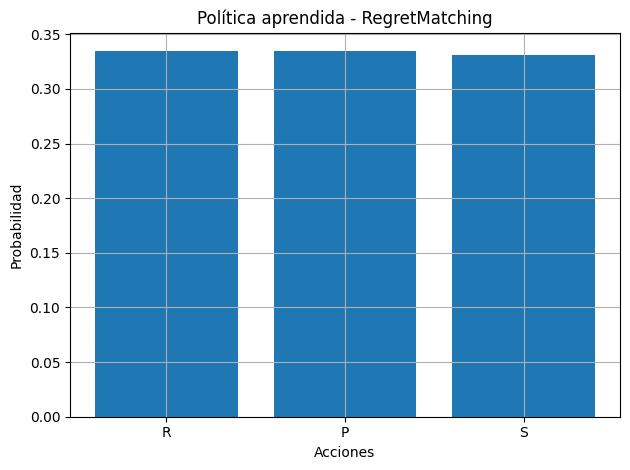

In [66]:
g.reset()

agent0 = FictitiousPlay(game=g, agent="agent_0")
agent1 = RegretMatching(game=g, agent="agent_1")

defined_agents, agent_names = train_agents(g, agent0, agent1, episodes=EPISODES)

# Opcional: congelar aprendizaje
defined_agents["agent_0"].learn = False

# Test
test_agents(g, defined_agents, agent_names, rounds=10)

__RandomAgent VS RegretMatching__


Juegos posteriores al entrenamiento:

Juego 1:
RandomAgent (agent_0) eligió: R | Recompensa: 1.0
RegretMatching (agent_1) eligió: S | Recompensa: -1.0

Juego 2:
RandomAgent (agent_0) eligió: R | Recompensa: 1.0
RegretMatching (agent_1) eligió: S | Recompensa: -1.0

Juego 3:
RandomAgent (agent_0) eligió: P | Recompensa: -1.0
RegretMatching (agent_1) eligió: S | Recompensa: 1.0

Juego 4:
RandomAgent (agent_0) eligió: R | Recompensa: 1.0
RegretMatching (agent_1) eligió: S | Recompensa: -1.0

Juego 5:
RandomAgent (agent_0) eligió: R | Recompensa: 1.0
RegretMatching (agent_1) eligió: S | Recompensa: -1.0

Juego 6:
RandomAgent (agent_0) eligió: S | Recompensa: 0.0
RegretMatching (agent_1) eligió: S | Recompensa: -0.0

Juego 7:
RandomAgent (agent_0) eligió: R | Recompensa: 1.0
RegretMatching (agent_1) eligió: S | Recompensa: -1.0

Juego 8:
RandomAgent (agent_0) eligió: R | Recompensa: 1.0
RegretMatching (agent_1) eligió: S | Recompensa: -1.0

Juego 9:
RandomAgent (agent_0) eligió: R | Recomp

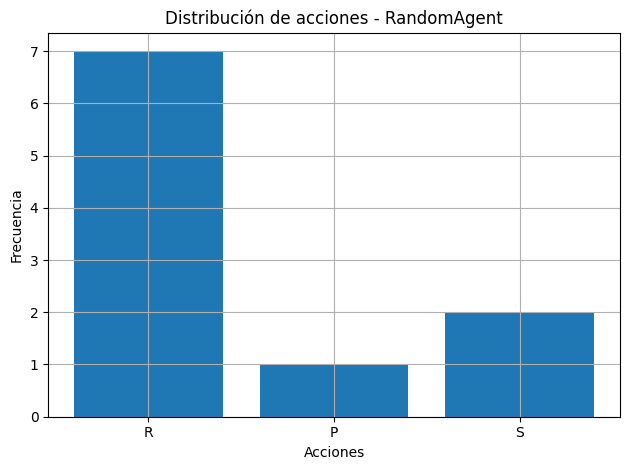

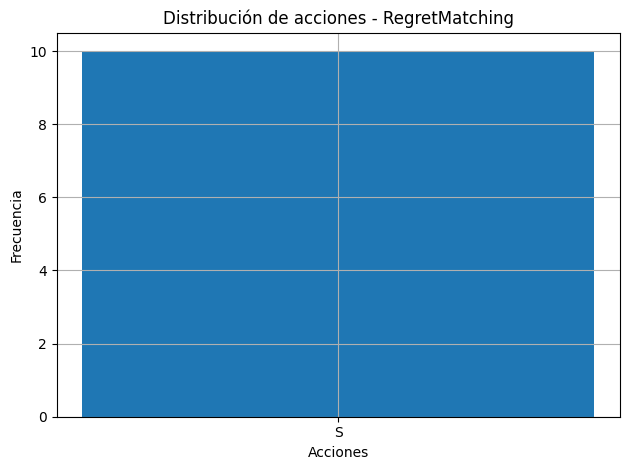

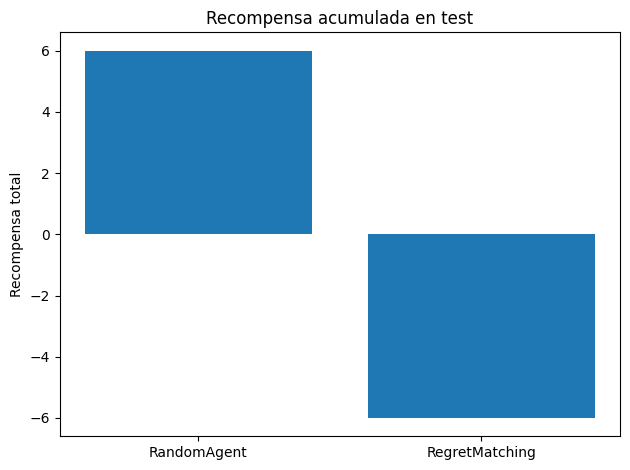

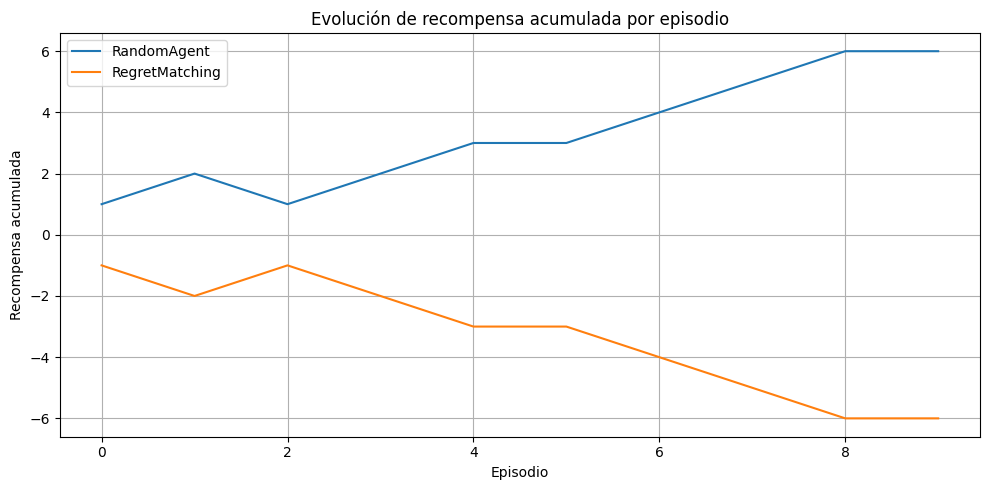

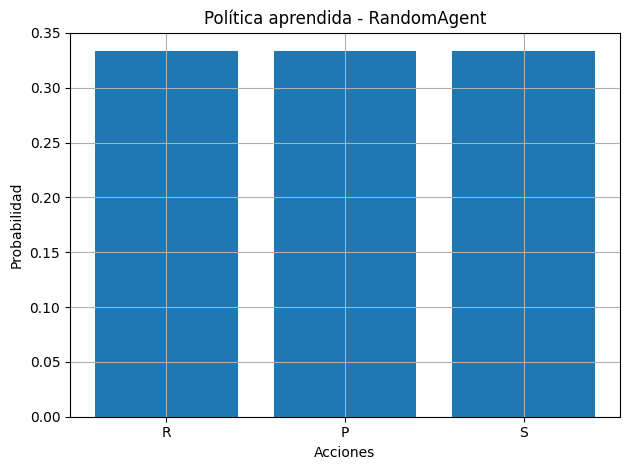

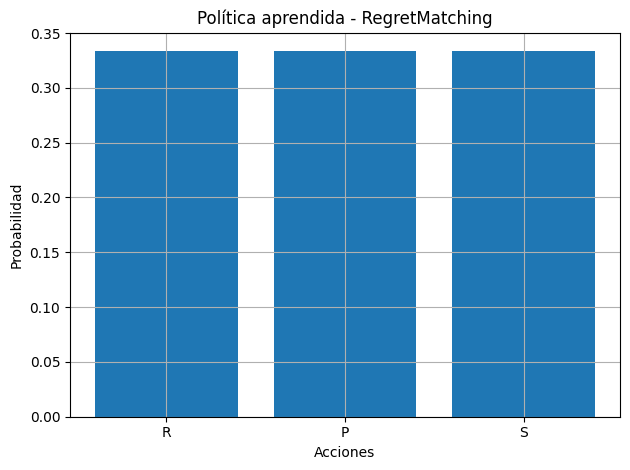

In [67]:
g.reset()

agent0 = RandomAgent(game=g, agent="agent_0")
agent1 = RegretMatching(game=g, agent="agent_1")

defined_agents, agent_names = train_agents(g, agent0, agent1, episodes=EPISODES)

# Opcional: congelar aprendizaje
defined_agents["agent_0"].learn = False

# Test
test_agents(g, defined_agents, agent_names, rounds=10)

----

# __BLOTTO(5, 2)__

In [68]:
S = 5
N = 2

In [69]:
g = Blotto(S, N)

In [70]:
def train_blotto(g, agent0, agent1, episodes=EPISODES):
    from collections import Counter
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd

    defined_agents = {
        "agent_0": agent0,
        "agent_1": agent1
    }

    agent_names = {
        "agent_0": type(agent0).__name__,
        "agent_1": type(agent1).__name__
    }

    for _ in range(episodes):
        actions = {agent: defined_agents[agent].action() for agent in g.agents}
        g.step(actions)

    return defined_agents, agent_names

def test_blotto(g, defined_agents, agent_names, rounds=10):
    print("\nJuegos posteriores al entrenamiento:")

    action_history = defaultdict(list)
    total_rewards = {agent: 0 for agent in g.agents}
    reward_history = defaultdict(list)

    for i in range(rounds):
        g.reset()
        actions = {agent: defined_agents[agent].action() for agent in g.agents}
        obs, rewards, terminations, truncations, infos = g.step(actions)

        print(f"\nJuego {i + 1}:")
        for agent in g.agents:
            action_idx = actions[agent]
            move = g._moves[action_idx]
            print(f"{agent_names[agent]} ({agent}) eligió: {move} | Recompensa: {rewards[agent]}")
            action_history[agent].append(tuple(move))
            total_rewards[agent] += rewards[agent]
            reward_history[agent].append(total_rewards[agent])  # acumulado por episodio

    # --- Gráfico 1: Top 10 estrategias más usadas ---
    for agent in g.agents:
        top = pd.Series(action_history[agent]).value_counts().head(10)

        plt.figure(figsize=(8, 4))
        sns.barplot(x=top.values, y=[str(a) for a in top.index])
        plt.title(f"Top estrategias más usadas - {agent_names[agent]}")
        plt.xlabel("Frecuencia")
        plt.ylabel("Estrategia (distribución de soldados)")
        plt.tight_layout()
        plt.show()

    # --- Gráfico 2: Recompensa acumulada total ---
    plt.figure()
    agent_labels = [agent_names[agent] for agent in g.agents]
    rewards = [total_rewards[agent] for agent in g.agents]
    plt.bar(agent_labels, rewards)
    plt.title("Recompensa acumulada en test")
    plt.ylabel("Recompensa total")
    plt.tight_layout()
    plt.show()

    # --- Gráfico 3: Recompensa acumulada por episodio ---
    plt.figure(figsize=(10, 5))
    for agent in g.agents:
        plt.plot(reward_history[agent], label=agent_names[agent])
    plt.title("Evolución de recompensa acumulada por episodio")
    plt.xlabel("Episodio")
    plt.ylabel("Recompensa acumulada")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # --- Gráfico 4: Política aprendida (si existe) ---
    for agent in g.agents:
        if hasattr(defined_agents[agent], "policy"):
            policy = defined_agents[agent].policy()
            move_labels = [str(g._moves[i]) for i in range(len(policy))]

            df = pd.DataFrame({"Acción": move_labels, "Probabilidad": policy})
            df = df.sort_values("Probabilidad", ascending=False).head(10)

            plt.figure(figsize=(8, 4))
            sns.barplot(x="Probabilidad", y="Acción", data=df)
            plt.title(f"Top políticas aprendidas - {agent_names[agent]}")
            plt.tight_layout()
            plt.show()

__FictitiousPlay VS RandomAgent__


Juegos posteriores al entrenamiento:

Juego 1:
FictitiousPlay (agent_0) eligió: [1, 4] | Recompensa: 0.0
RandomAgent (agent_1) eligió: [1, 4] | Recompensa: -0.0

Juego 2:
FictitiousPlay (agent_0) eligió: [1, 4] | Recompensa: 0.0
RandomAgent (agent_1) eligió: [1, 4] | Recompensa: -0.0

Juego 3:
FictitiousPlay (agent_0) eligió: [1, 4] | Recompensa: 0.0
RandomAgent (agent_1) eligió: [2, 3] | Recompensa: -0.0

Juego 4:
FictitiousPlay (agent_0) eligió: [1, 4] | Recompensa: 0.0
RandomAgent (agent_1) eligió: [2, 3] | Recompensa: -0.0

Juego 5:
FictitiousPlay (agent_0) eligió: [1, 4] | Recompensa: 0.0
RandomAgent (agent_1) eligió: [1, 4] | Recompensa: -0.0

Juego 6:
FictitiousPlay (agent_0) eligió: [1, 4] | Recompensa: 0.0
RandomAgent (agent_1) eligió: [2, 3] | Recompensa: -0.0

Juego 7:
FictitiousPlay (agent_0) eligió: [1, 4] | Recompensa: 0.0
RandomAgent (agent_1) eligió: [1, 4] | Recompensa: -0.0

Juego 8:
FictitiousPlay (agent_0) eligió: [1, 4] | Recompensa: 0.0
RandomAgent (agent_1) elig

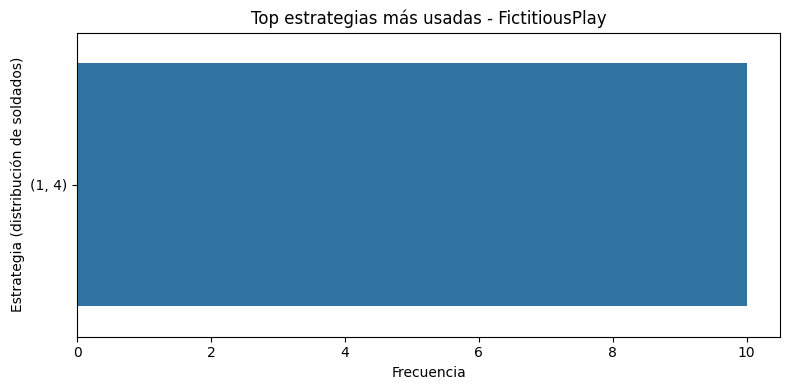

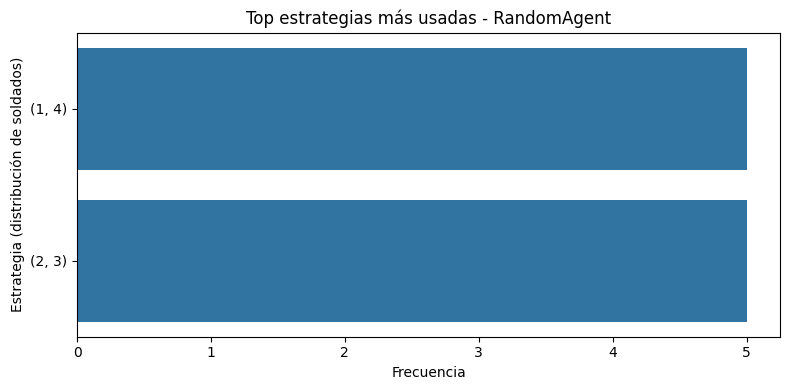

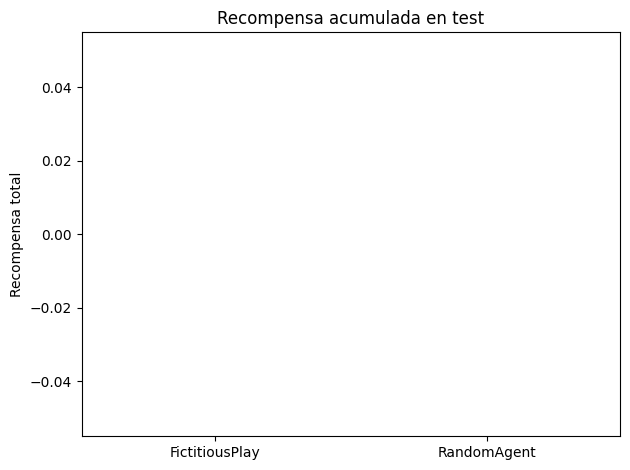

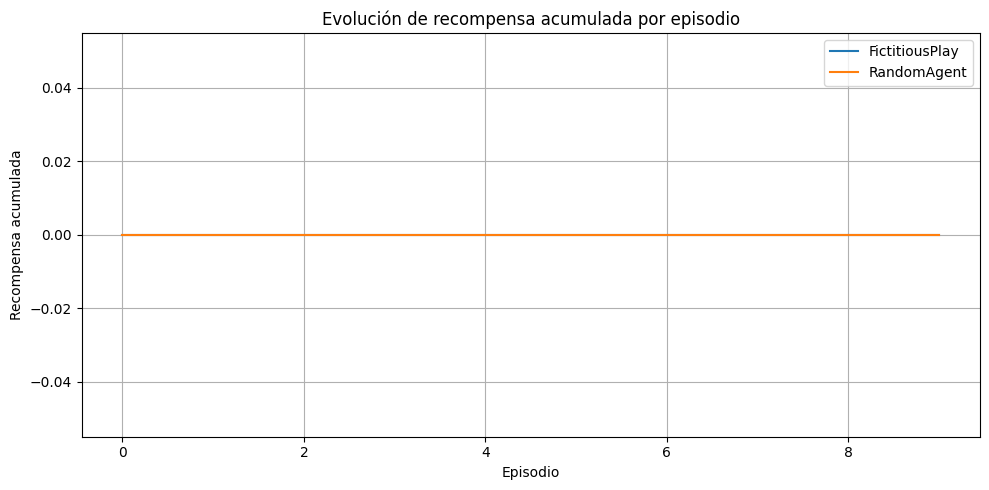

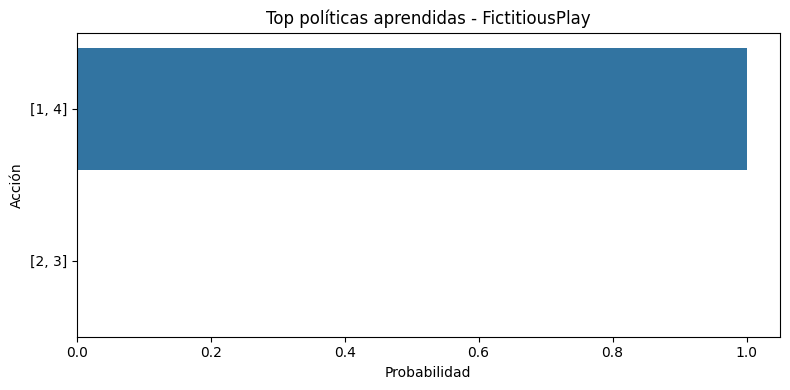

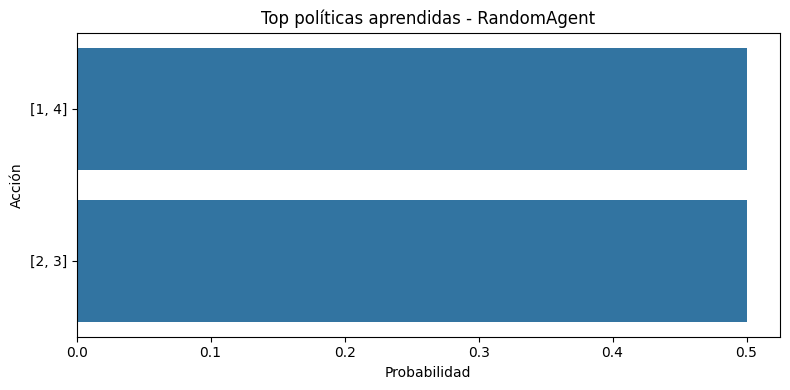

In [71]:
g.reset()

agent0 = FictitiousPlay(game=g, agent="agent_0")
agent1 = RandomAgent(game=g, agent="agent_1")

# Entrenamiento
defined_agents, agent_names = train_blotto(g, agent0, agent1, episodes=EPISODES)

# Congelar aprendizaje
defined_agents["agent_0"].learn = False
defined_agents["agent_1"].learn = False

# Testeo
test_blotto(g, defined_agents, agent_names, rounds=10)

__FictitiousPlay VS RegretMatching__


Juegos posteriores al entrenamiento:

Juego 1:
FictitiousPlay (agent_0) eligió: [1, 4] | Recompensa: 0.0
RegretMatching (agent_1) eligió: [2, 3] | Recompensa: -0.0

Juego 2:
FictitiousPlay (agent_0) eligió: [1, 4] | Recompensa: 0.0
RegretMatching (agent_1) eligió: [2, 3] | Recompensa: -0.0

Juego 3:
FictitiousPlay (agent_0) eligió: [1, 4] | Recompensa: 0.0
RegretMatching (agent_1) eligió: [2, 3] | Recompensa: -0.0

Juego 4:
FictitiousPlay (agent_0) eligió: [1, 4] | Recompensa: 0.0
RegretMatching (agent_1) eligió: [1, 4] | Recompensa: -0.0

Juego 5:
FictitiousPlay (agent_0) eligió: [1, 4] | Recompensa: 0.0
RegretMatching (agent_1) eligió: [1, 4] | Recompensa: -0.0

Juego 6:
FictitiousPlay (agent_0) eligió: [1, 4] | Recompensa: 0.0
RegretMatching (agent_1) eligió: [1, 4] | Recompensa: -0.0

Juego 7:
FictitiousPlay (agent_0) eligió: [1, 4] | Recompensa: 0.0
RegretMatching (agent_1) eligió: [1, 4] | Recompensa: -0.0

Juego 8:
FictitiousPlay (agent_0) eligió: [1, 4] | Recompensa: 0.0
Regre

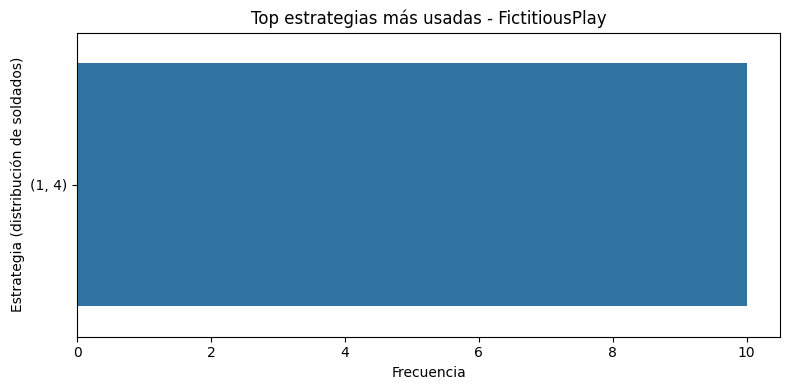

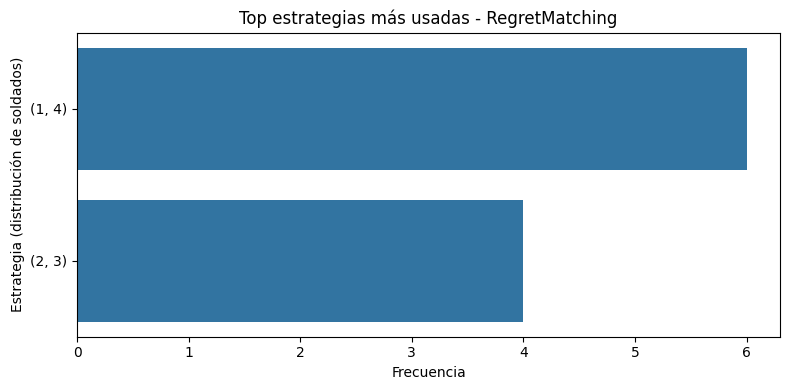

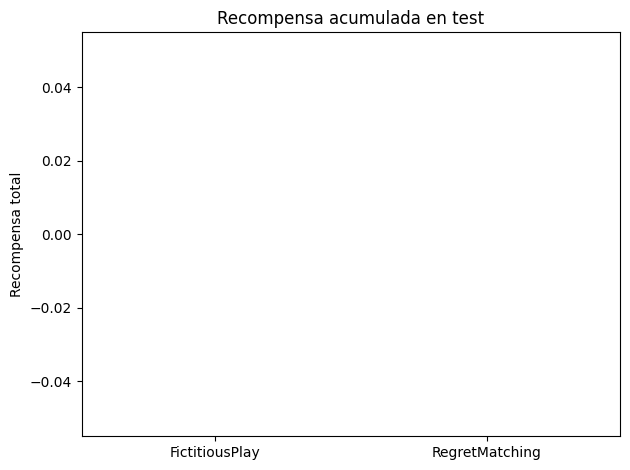

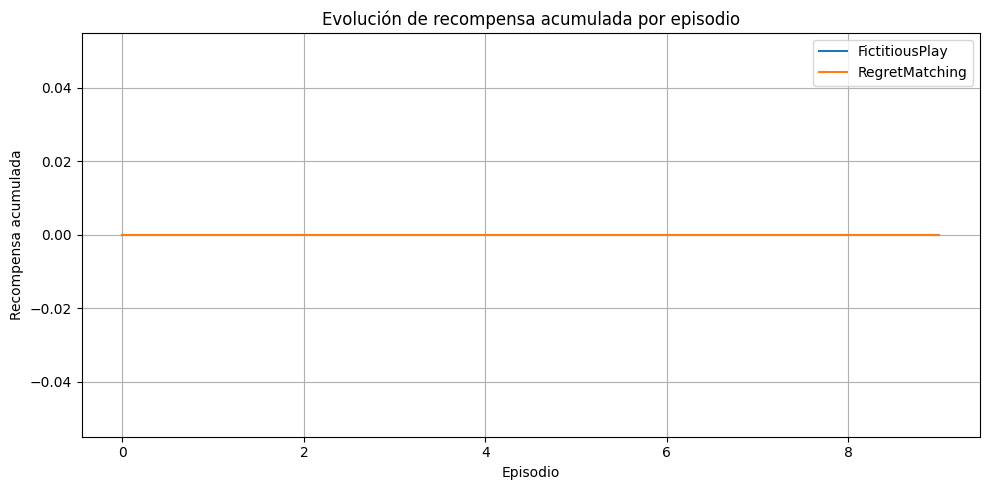

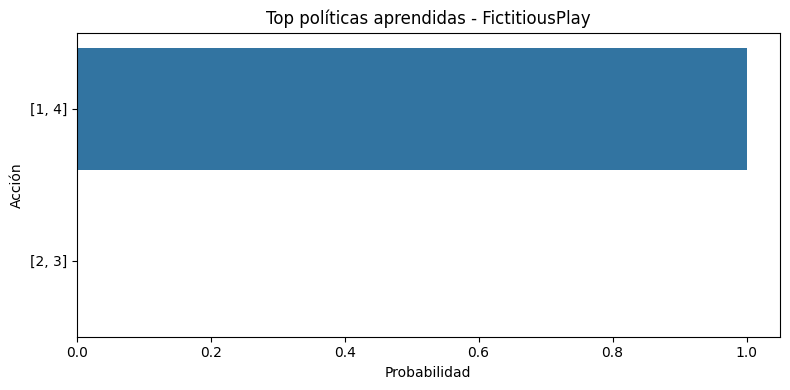

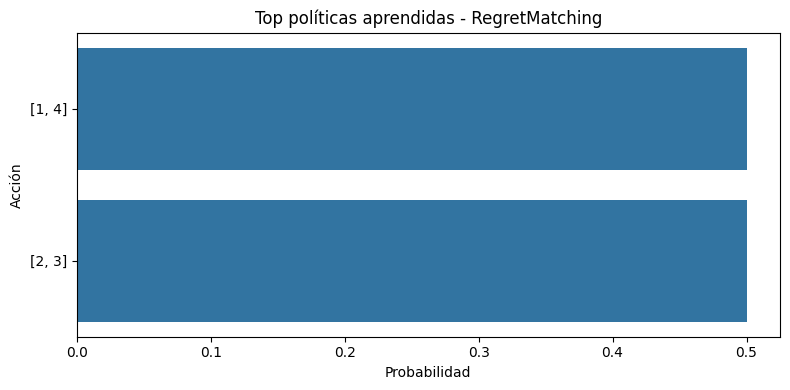

In [72]:
g.reset()

agent0 = FictitiousPlay(game=g, agent="agent_0")
agent1 = RegretMatching(game=g, agent="agent_1")

# Entrenamiento
defined_agents, agent_names = train_blotto(g, agent0, agent1, episodes=EPISODES)

# Congelar aprendizaje
defined_agents["agent_0"].learn = False
defined_agents["agent_1"].learn = False

# Testeo
test_blotto(g, defined_agents, agent_names, rounds=10)

__RandomAgent VS RegretMatching__


Juegos posteriores al entrenamiento:

Juego 1:
RandomAgent (agent_0) eligió: [1, 4] | Recompensa: 0.0
RegretMatching (agent_1) eligió: [1, 4] | Recompensa: -0.0

Juego 2:
RandomAgent (agent_0) eligió: [1, 4] | Recompensa: 0.0
RegretMatching (agent_1) eligió: [1, 4] | Recompensa: -0.0

Juego 3:
RandomAgent (agent_0) eligió: [2, 3] | Recompensa: 0.0
RegretMatching (agent_1) eligió: [2, 3] | Recompensa: -0.0

Juego 4:
RandomAgent (agent_0) eligió: [1, 4] | Recompensa: 0.0
RegretMatching (agent_1) eligió: [2, 3] | Recompensa: -0.0

Juego 5:
RandomAgent (agent_0) eligió: [2, 3] | Recompensa: 0.0
RegretMatching (agent_1) eligió: [1, 4] | Recompensa: -0.0

Juego 6:
RandomAgent (agent_0) eligió: [1, 4] | Recompensa: 0.0
RegretMatching (agent_1) eligió: [2, 3] | Recompensa: -0.0

Juego 7:
RandomAgent (agent_0) eligió: [2, 3] | Recompensa: 0.0
RegretMatching (agent_1) eligió: [2, 3] | Recompensa: -0.0

Juego 8:
RandomAgent (agent_0) eligió: [2, 3] | Recompensa: 0.0
RegretMatching (agent_1) elig

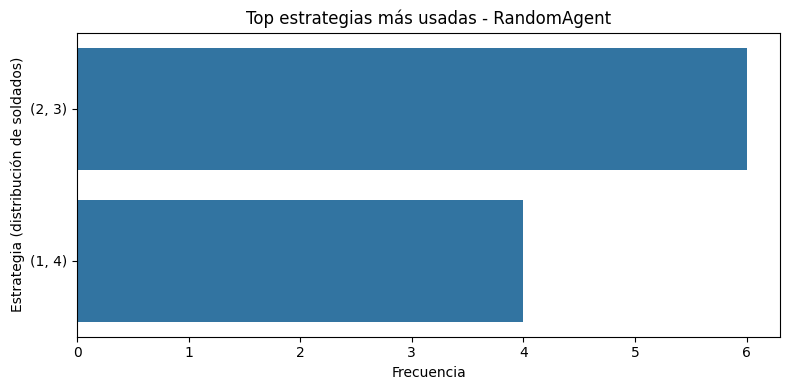

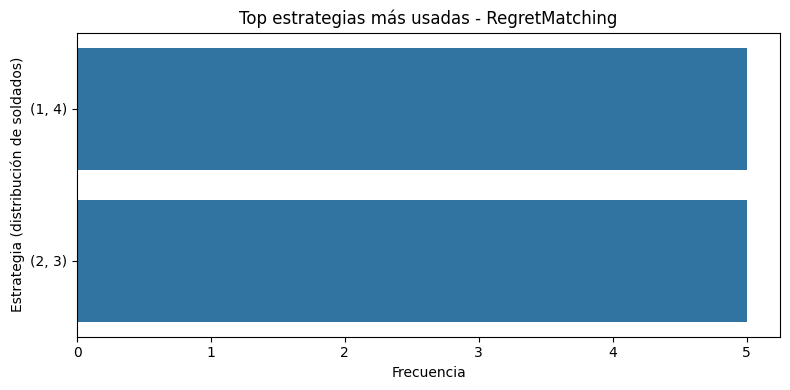

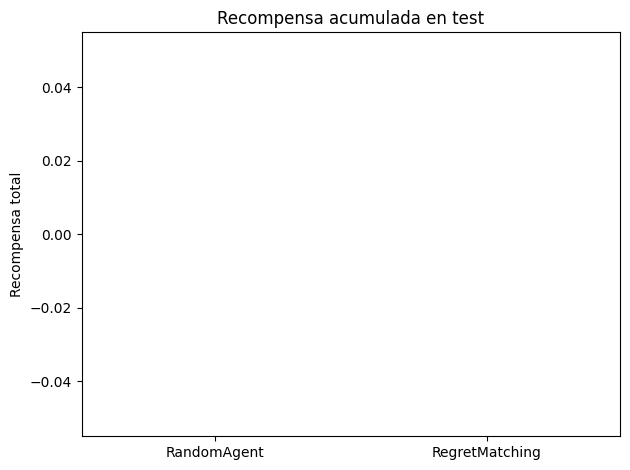

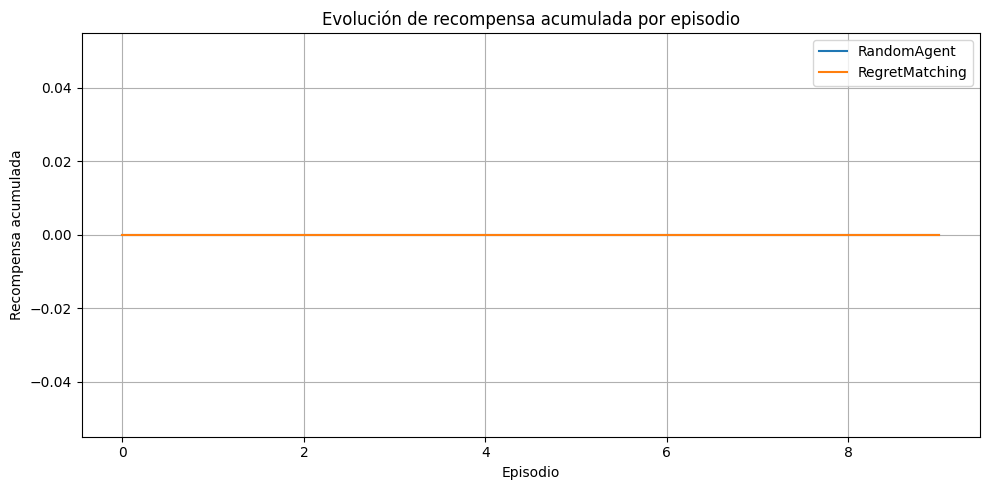

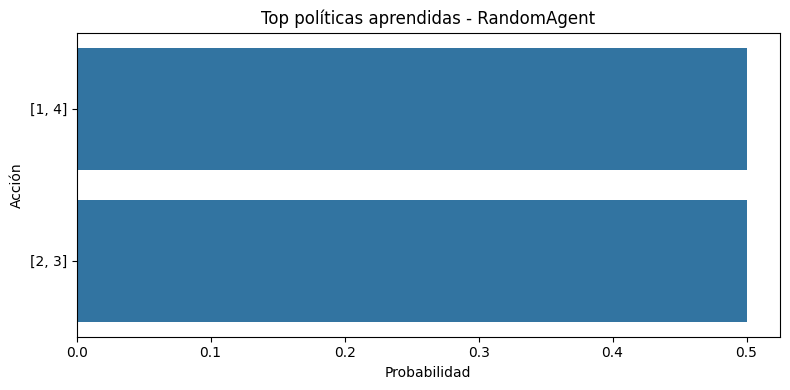

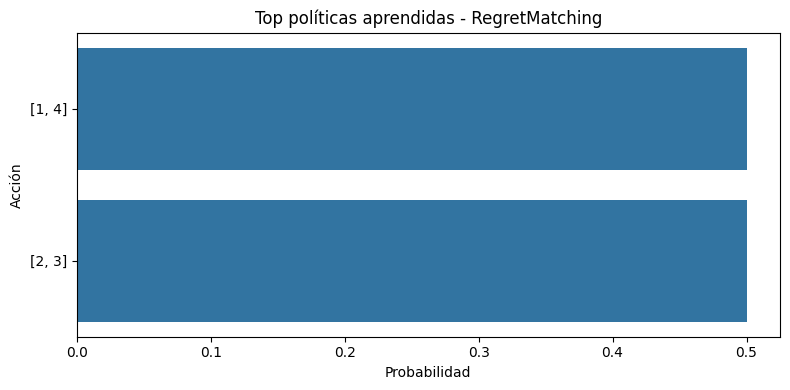

In [73]:
g.reset()

agent0 = RandomAgent(game=g, agent="agent_0")
agent1 = RegretMatching(game=g, agent="agent_1")

# Entrenamiento
defined_agents, agent_names = train_blotto(g, agent0, agent1, episodes=EPISODES)

# Congelar aprendizaje
defined_agents["agent_0"].learn = False
defined_agents["agent_1"].learn = False

# Testeo
test_blotto(g, defined_agents, agent_names, rounds=10)

# __BLOTTO(7, 3)__

In [74]:
S = 7
N = 3

In [75]:
g = Blotto(S, N)

__FictitiousPlay VS RandomAgent__


Juegos posteriores al entrenamiento:

Juego 1:
FictitiousPlay (agent_0) eligió: [2, 2, 3] | Recompensa: 0.0
RandomAgent (agent_1) eligió: [1, 3, 3] | Recompensa: -0.0

Juego 2:
FictitiousPlay (agent_0) eligió: [2, 2, 3] | Recompensa: 0.0
RandomAgent (agent_1) eligió: [1, 3, 3] | Recompensa: -0.0

Juego 3:
FictitiousPlay (agent_0) eligió: [2, 2, 3] | Recompensa: 0.0
RandomAgent (agent_1) eligió: [2, 2, 3] | Recompensa: -0.0

Juego 4:
FictitiousPlay (agent_0) eligió: [2, 2, 3] | Recompensa: 0.0
RandomAgent (agent_1) eligió: [1, 2, 4] | Recompensa: -0.0

Juego 5:
FictitiousPlay (agent_0) eligió: [2, 2, 3] | Recompensa: 1.0
RandomAgent (agent_1) eligió: [1, 1, 5] | Recompensa: -1.0

Juego 6:
FictitiousPlay (agent_0) eligió: [2, 2, 3] | Recompensa: 0.0
RandomAgent (agent_1) eligió: [1, 3, 3] | Recompensa: -0.0

Juego 7:
FictitiousPlay (agent_0) eligió: [2, 2, 3] | Recompensa: 0.0
RandomAgent (agent_1) eligió: [1, 3, 3] | Recompensa: -0.0

Juego 8:
FictitiousPlay (agent_0) eligió: [2, 2, 3]

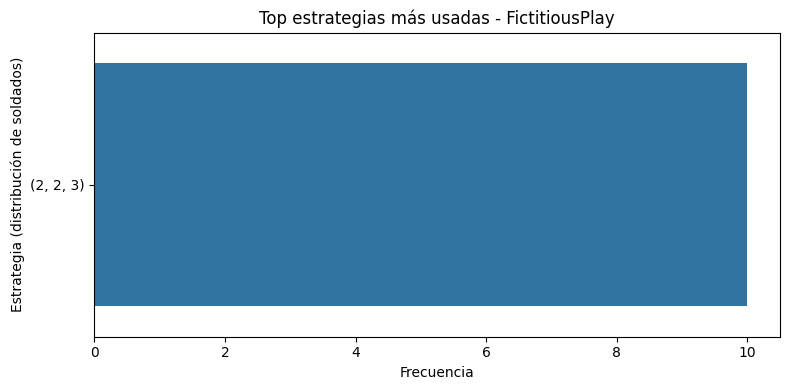

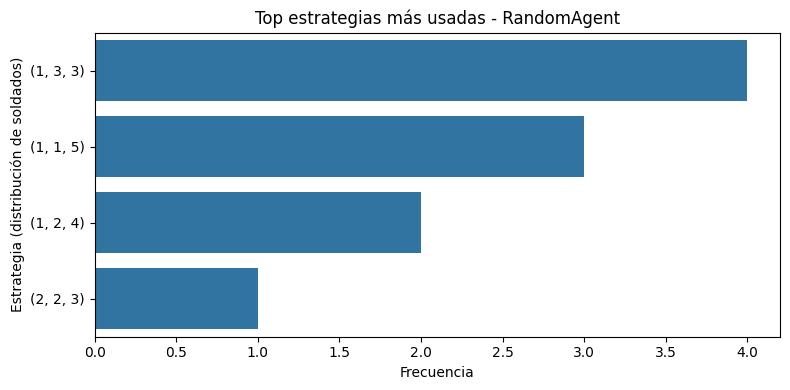

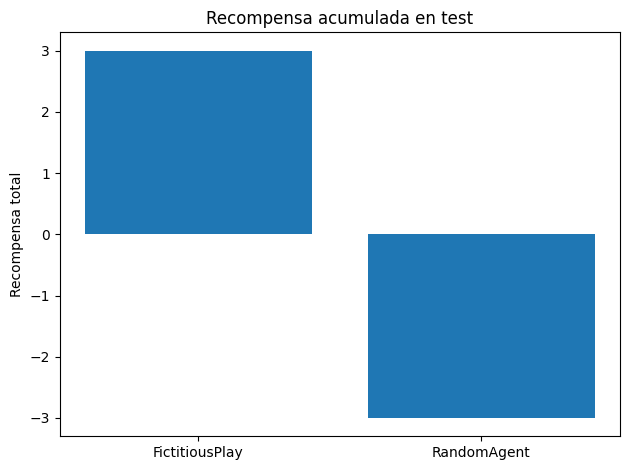

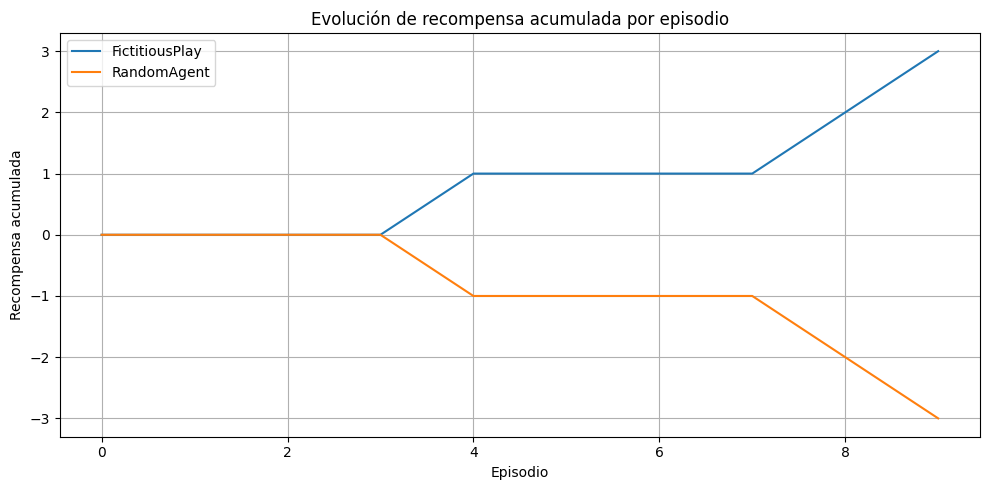

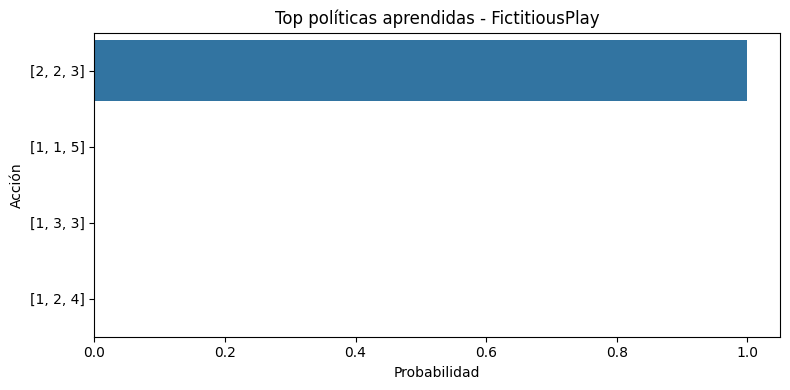

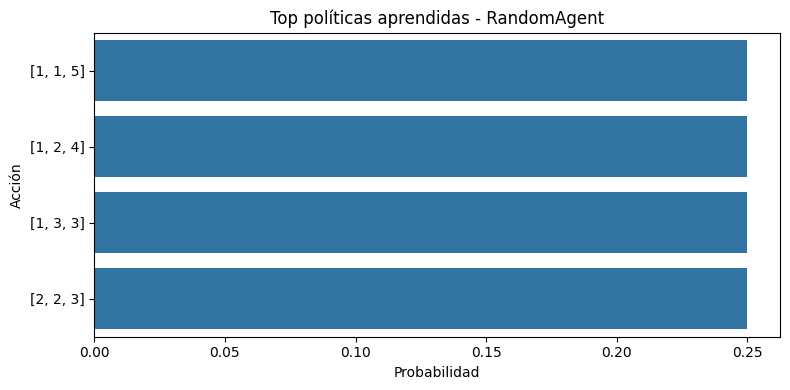

In [76]:
g.reset()

agent0 = FictitiousPlay(game=g, agent="agent_0")
agent1 = RandomAgent(game=g, agent="agent_1")

# Entrenamiento
defined_agents, agent_names = train_blotto(g, agent0, agent1, episodes=EPISODES)

# Congelar aprendizaje
defined_agents["agent_0"].learn = False
defined_agents["agent_1"].learn = False

# Testeo
test_blotto(g, defined_agents, agent_names, rounds=10)

__FictitiousPlay VS RegretMatching__


Juegos posteriores al entrenamiento:

Juego 1:
FictitiousPlay (agent_0) eligió: [2, 2, 3] | Recompensa: 0.0
RegretMatching (agent_1) eligió: [1, 3, 3] | Recompensa: -0.0

Juego 2:
FictitiousPlay (agent_0) eligió: [2, 2, 3] | Recompensa: 0.0
RegretMatching (agent_1) eligió: [1, 2, 4] | Recompensa: -0.0

Juego 3:
FictitiousPlay (agent_0) eligió: [2, 2, 3] | Recompensa: 0.0
RegretMatching (agent_1) eligió: [1, 3, 3] | Recompensa: -0.0

Juego 4:
FictitiousPlay (agent_0) eligió: [2, 2, 3] | Recompensa: 1.0
RegretMatching (agent_1) eligió: [1, 1, 5] | Recompensa: -1.0

Juego 5:
FictitiousPlay (agent_0) eligió: [2, 2, 3] | Recompensa: 0.0
RegretMatching (agent_1) eligió: [1, 3, 3] | Recompensa: -0.0

Juego 6:
FictitiousPlay (agent_0) eligió: [2, 2, 3] | Recompensa: 1.0
RegretMatching (agent_1) eligió: [1, 1, 5] | Recompensa: -1.0

Juego 7:
FictitiousPlay (agent_0) eligió: [2, 2, 3] | Recompensa: 0.0
RegretMatching (agent_1) eligió: [1, 3, 3] | Recompensa: -0.0

Juego 8:
FictitiousPlay (agent

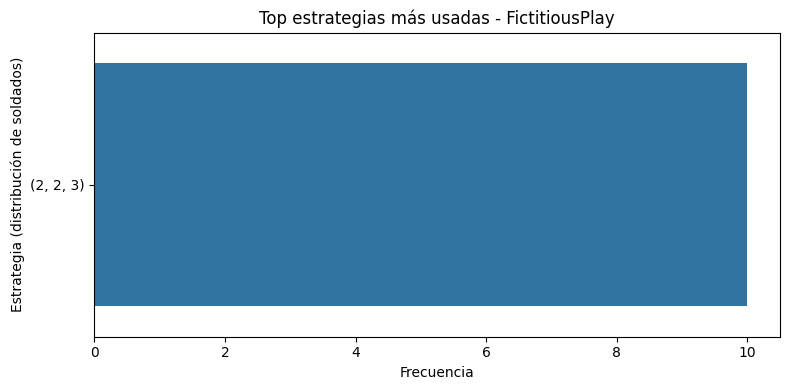

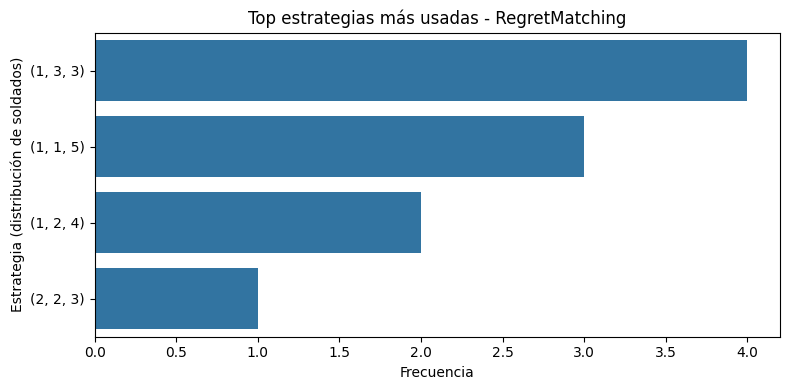

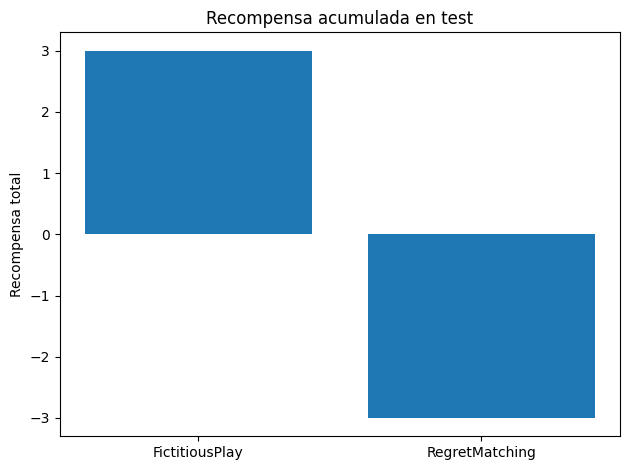

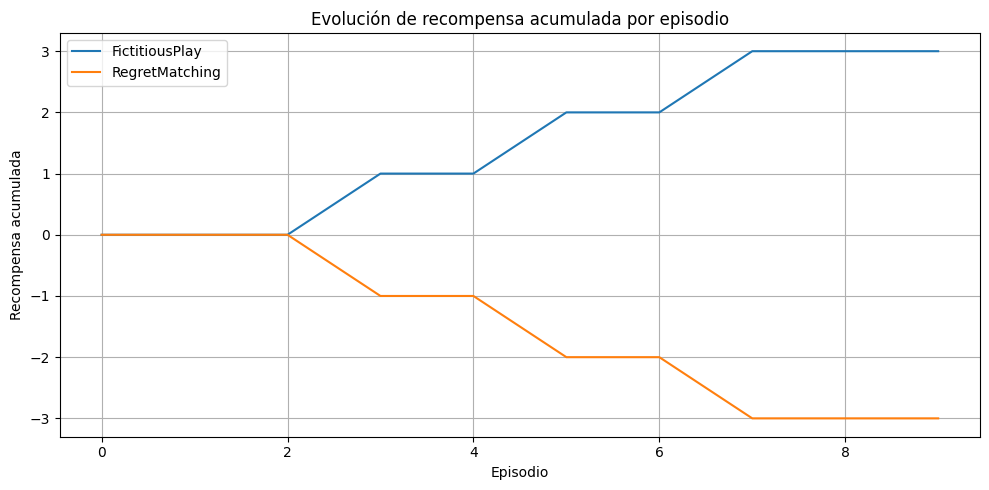

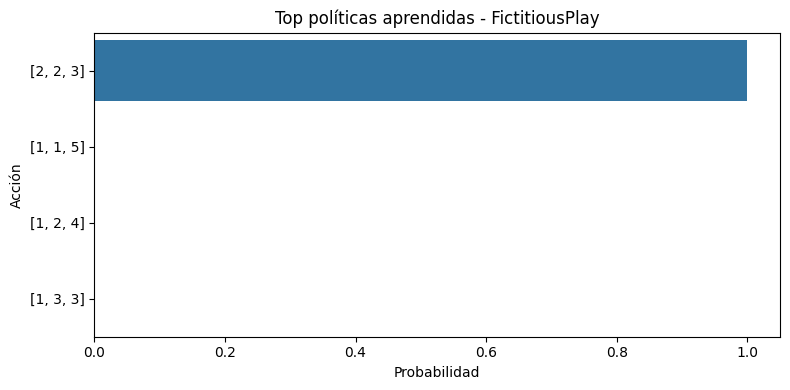

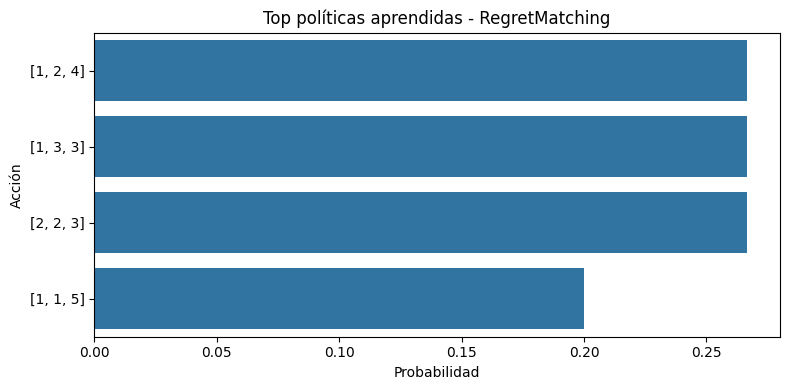

In [77]:
g.reset()

agent0 = FictitiousPlay(game=g, agent="agent_0")
agent1 = RegretMatching(game=g, agent="agent_1")

# Entrenamiento
defined_agents, agent_names = train_blotto(g, agent0, agent1, episodes=EPISODES)

# Congelar aprendizaje
defined_agents["agent_0"].learn = False
defined_agents["agent_1"].learn = False

# Testeo
test_blotto(g, defined_agents, agent_names, rounds=10)

__RandomAgent VS RegretMatching__


Juegos posteriores al entrenamiento:

Juego 1:
RandomAgent (agent_0) eligió: [1, 1, 5] | Recompensa: 0.0
RegretMatching (agent_1) eligió: [1, 2, 4] | Recompensa: -0.0

Juego 2:
RandomAgent (agent_0) eligió: [1, 2, 4] | Recompensa: 0.0
RegretMatching (agent_1) eligió: [1, 3, 3] | Recompensa: -0.0

Juego 3:
RandomAgent (agent_0) eligió: [1, 2, 4] | Recompensa: 0.0
RegretMatching (agent_1) eligió: [1, 3, 3] | Recompensa: -0.0

Juego 4:
RandomAgent (agent_0) eligió: [2, 2, 3] | Recompensa: 0.0
RegretMatching (agent_1) eligió: [1, 3, 3] | Recompensa: -0.0

Juego 5:
RandomAgent (agent_0) eligió: [1, 3, 3] | Recompensa: 0.0
RegretMatching (agent_1) eligió: [1, 3, 3] | Recompensa: -0.0

Juego 6:
RandomAgent (agent_0) eligió: [2, 2, 3] | Recompensa: 0.0
RegretMatching (agent_1) eligió: [1, 3, 3] | Recompensa: -0.0

Juego 7:
RandomAgent (agent_0) eligió: [1, 3, 3] | Recompensa: 0.0
RegretMatching (agent_1) eligió: [2, 2, 3] | Recompensa: -0.0

Juego 8:
RandomAgent (agent_0) eligió: [1, 1, 5] | 

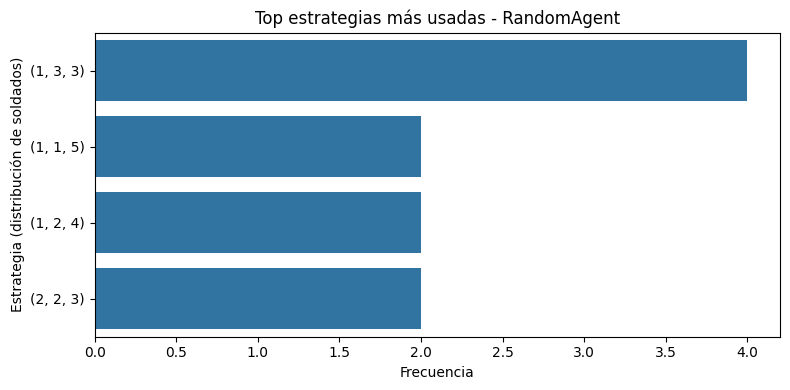

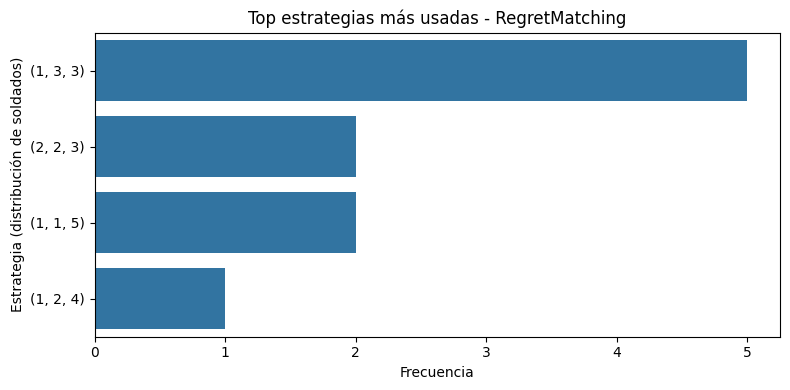

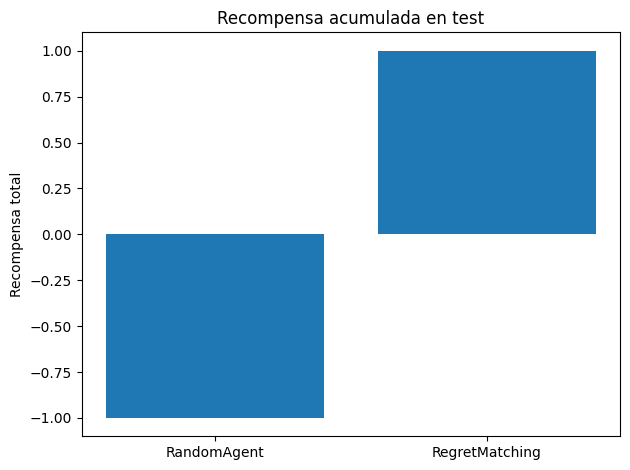

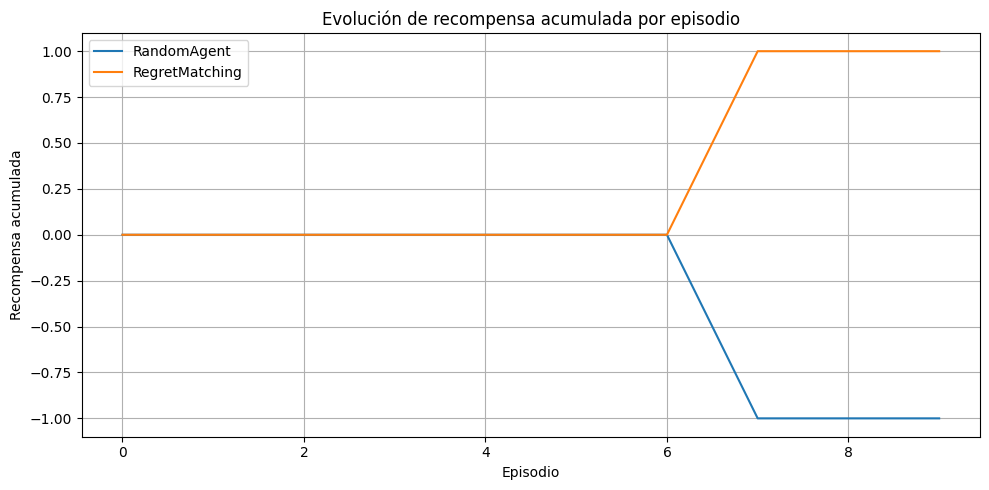

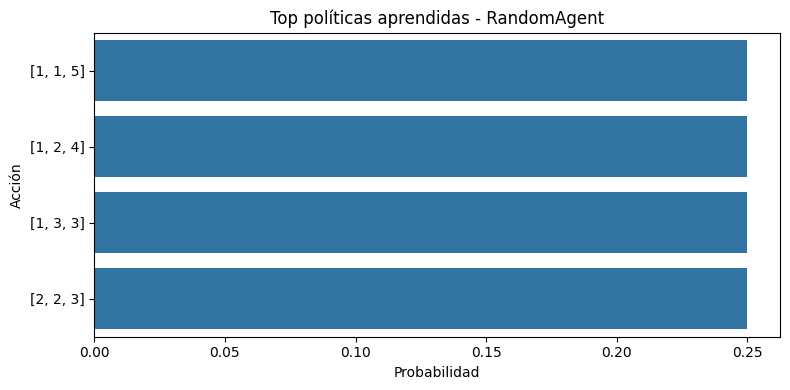

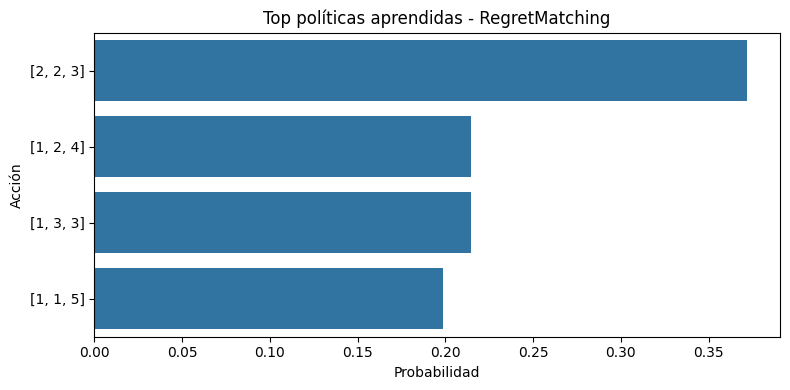

In [78]:
g.reset()

agent0 = RandomAgent(game=g, agent="agent_0")
agent1 = RegretMatching(game=g, agent="agent_1")

# Entrenamiento
defined_agents, agent_names = train_blotto(g, agent0, agent1, episodes=EPISODES)

# Congelar aprendizaje
defined_agents["agent_0"].learn = False
defined_agents["agent_1"].learn = False

# Testeo
test_blotto(g, defined_agents, agent_names, rounds=10)

# __BLOTTO(12, 4)__

In [83]:
S = 12
N = 4

In [84]:
g = Blotto(S, N)

__FictitiousPlay VS RandomAgent__


Juegos posteriores al entrenamiento:

Juego 1:
FictitiousPlay (agent_0) eligió: [2, 3, 3, 4] | Recompensa: 0.0
RandomAgent (agent_1) eligió: [3, 3, 3, 3] | Recompensa: -0.0

Juego 2:
FictitiousPlay (agent_0) eligió: [2, 3, 3, 4] | Recompensa: 0.0
RandomAgent (agent_1) eligió: [3, 3, 3, 3] | Recompensa: -0.0

Juego 3:
FictitiousPlay (agent_0) eligió: [2, 3, 3, 4] | Recompensa: 1.0
RandomAgent (agent_1) eligió: [1, 2, 2, 7] | Recompensa: -1.0

Juego 4:
FictitiousPlay (agent_0) eligió: [2, 3, 3, 4] | Recompensa: 1.0
RandomAgent (agent_1) eligió: [1, 1, 2, 8] | Recompensa: -1.0

Juego 5:
FictitiousPlay (agent_0) eligió: [2, 3, 3, 4] | Recompensa: 0.0
RandomAgent (agent_1) eligió: [2, 3, 3, 4] | Recompensa: -0.0

Juego 6:
FictitiousPlay (agent_0) eligió: [2, 3, 3, 4] | Recompensa: 0.0
RandomAgent (agent_1) eligió: [2, 2, 4, 4] | Recompensa: -0.0

Juego 7:
FictitiousPlay (agent_0) eligió: [2, 3, 3, 4] | Recompensa: 0.0
RandomAgent (agent_1) eligió: [3, 3, 3, 3] | Recompensa: -0.0

Juego 8:


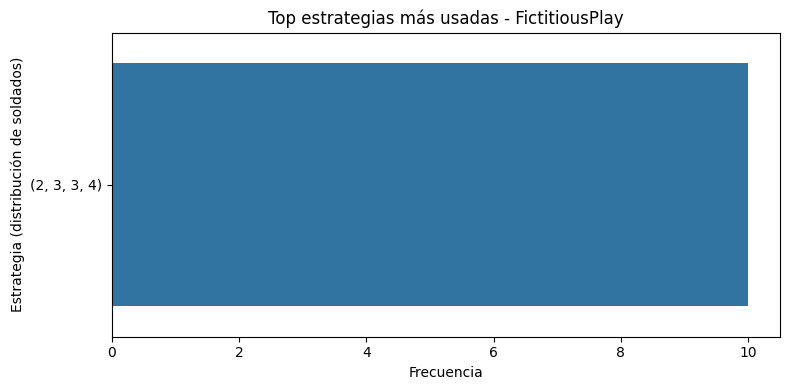

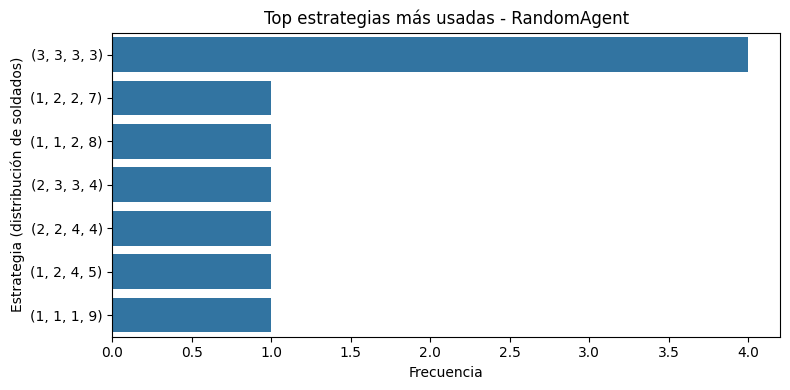

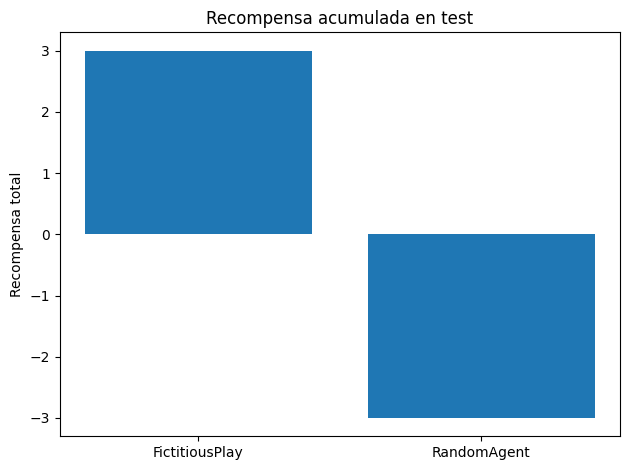

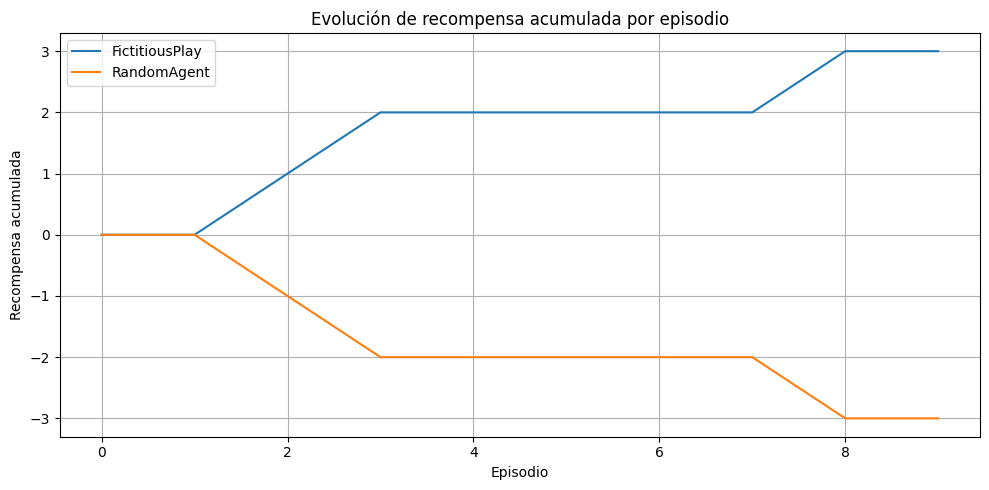

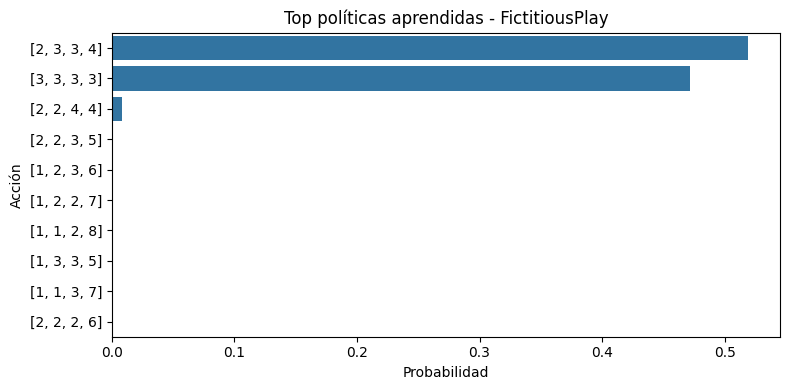

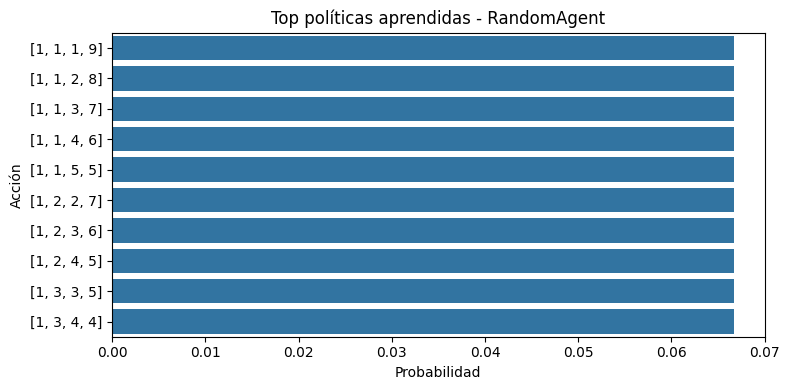

In [81]:
g.reset()

agent0 = FictitiousPlay(game=g, agent="agent_0")
agent1 = RandomAgent(game=g, agent="agent_1")

# Entrenamiento
defined_agents, agent_names = train_blotto(g, agent0, agent1, episodes=EPISODES)

# Congelar aprendizaje
defined_agents["agent_0"].learn = False
defined_agents["agent_1"].learn = False

# Testeo
test_blotto(g, defined_agents, agent_names, rounds=10)

__FictitiousPlay VS RegretMatching__


Juegos posteriores al entrenamiento:

Juego 1:
FictitiousPlay (agent_0) eligió: [2, 2, 4, 4] | Recompensa: 0.0
RegretMatching (agent_1) eligió: [2, 2, 4, 4] | Recompensa: -0.0

Juego 2:
FictitiousPlay (agent_0) eligió: [2, 2, 4, 4] | Recompensa: 0.0
RegretMatching (agent_1) eligió: [1, 1, 5, 5] | Recompensa: -0.0

Juego 3:
FictitiousPlay (agent_0) eligió: [2, 2, 4, 4] | Recompensa: 0.0
RegretMatching (agent_1) eligió: [1, 3, 4, 4] | Recompensa: -0.0

Juego 4:
FictitiousPlay (agent_0) eligió: [2, 2, 4, 4] | Recompensa: 0.0
RegretMatching (agent_1) eligió: [2, 2, 2, 6] | Recompensa: -0.0

Juego 5:
FictitiousPlay (agent_0) eligió: [2, 2, 4, 4] | Recompensa: 1.0
RegretMatching (agent_1) eligió: [1, 1, 1, 9] | Recompensa: -1.0

Juego 6:
FictitiousPlay (agent_0) eligió: [2, 2, 4, 4] | Recompensa: 0.0
RegretMatching (agent_1) eligió: [2, 3, 3, 4] | Recompensa: -0.0

Juego 7:
FictitiousPlay (agent_0) eligió: [2, 2, 4, 4] | Recompensa: 1.0
RegretMatching (agent_1) eligió: [1, 1, 3, 7] | Recomp

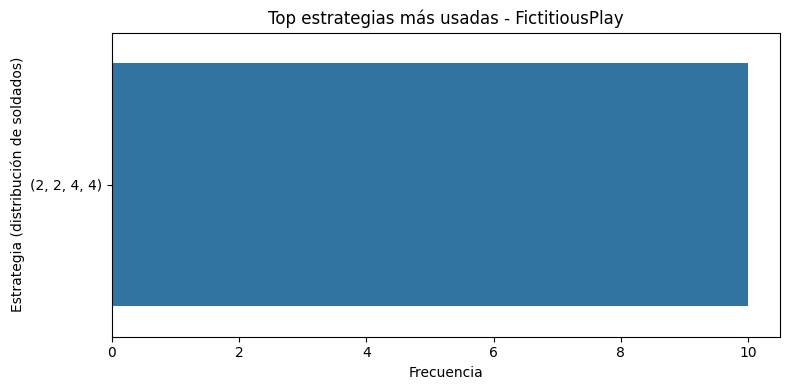

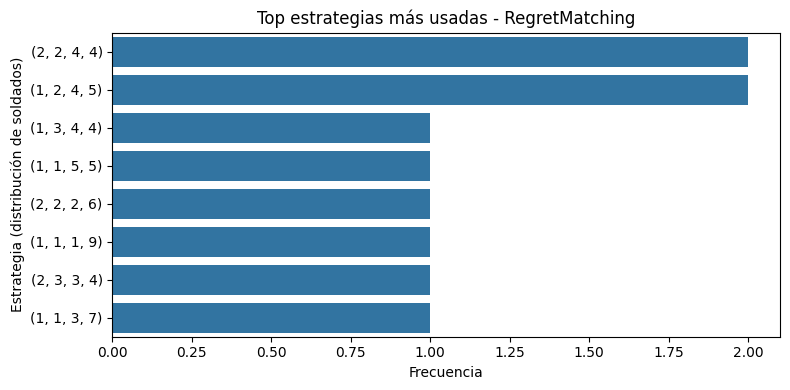

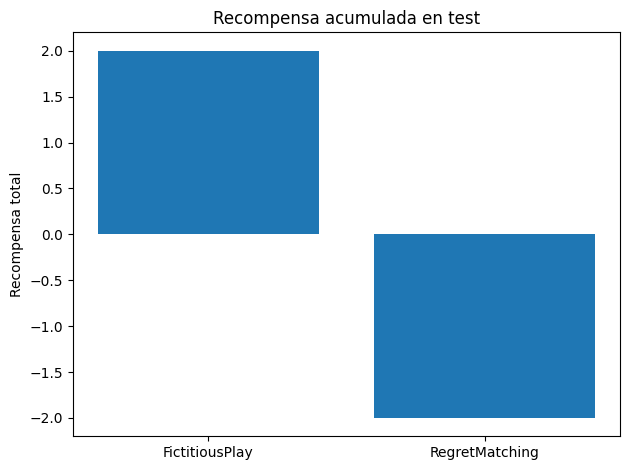

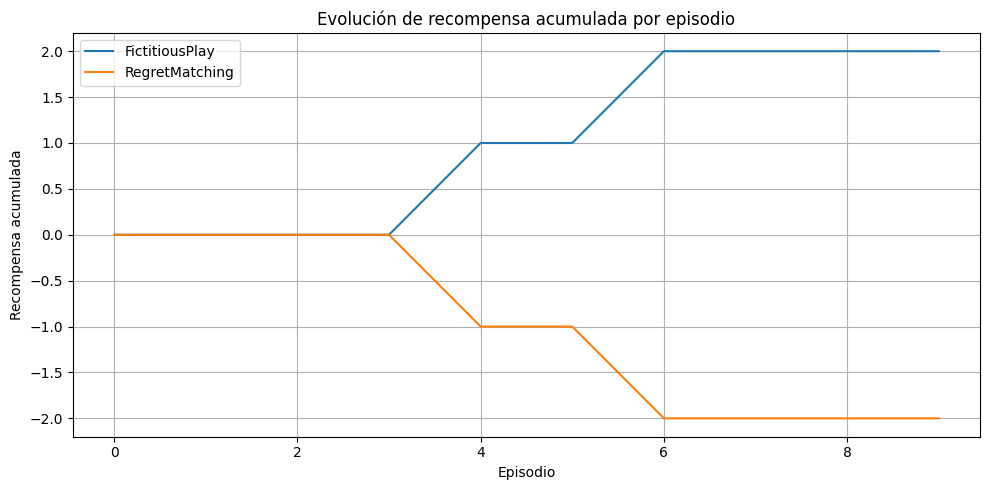

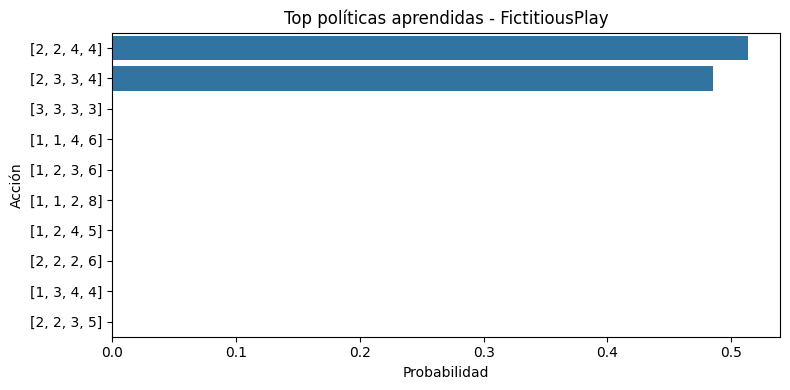

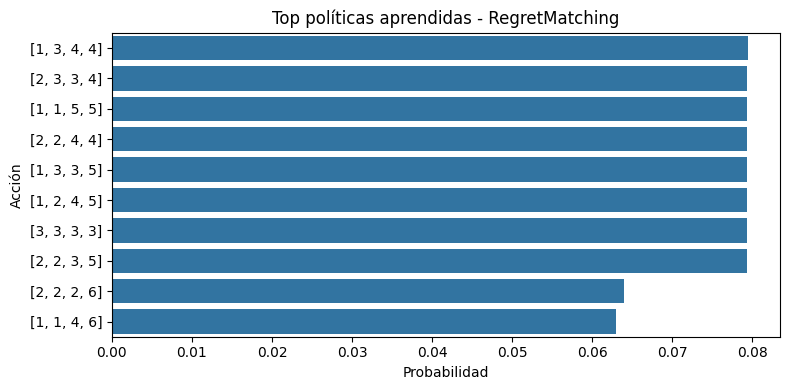

In [85]:
g.reset()

agent0 = FictitiousPlay(game=g, agent="agent_0")
agent1 = RegretMatching(game=g, agent="agent_1")

# Entrenamiento
defined_agents, agent_names = train_blotto(g, agent0, agent1, episodes=EPISODES)

# Congelar aprendizaje
defined_agents["agent_0"].learn = False
defined_agents["agent_1"].learn = False

# Testeo
test_blotto(g, defined_agents, agent_names, rounds=10)

__RandomAgent VS RegretMatching__


Juegos posteriores al entrenamiento:

Juego 1:
RandomAgent (agent_0) eligió: [1, 2, 4, 5] | Recompensa: 0.0
RegretMatching (agent_1) eligió: [1, 3, 4, 4] | Recompensa: -0.0

Juego 2:
RandomAgent (agent_0) eligió: [2, 2, 3, 5] | Recompensa: 0.0
RegretMatching (agent_1) eligió: [1, 3, 4, 4] | Recompensa: -0.0

Juego 3:
RandomAgent (agent_0) eligió: [1, 1, 5, 5] | Recompensa: 1.0
RegretMatching (agent_1) eligió: [1, 3, 4, 4] | Recompensa: -1.0

Juego 4:
RandomAgent (agent_0) eligió: [1, 1, 2, 8] | Recompensa: -1.0
RegretMatching (agent_1) eligió: [1, 3, 4, 4] | Recompensa: 1.0

Juego 5:
RandomAgent (agent_0) eligió: [2, 2, 2, 6] | Recompensa: 0.0
RegretMatching (agent_1) eligió: [1, 3, 4, 4] | Recompensa: -0.0

Juego 6:
RandomAgent (agent_0) eligió: [1, 1, 4, 6] | Recompensa: 0.0
RegretMatching (agent_1) eligió: [1, 3, 4, 4] | Recompensa: -0.0

Juego 7:
RandomAgent (agent_0) eligió: [1, 1, 2, 8] | Recompensa: -1.0
RegretMatching (agent_1) eligió: [1, 3, 4, 4] | Recompensa: 1.0

Juego 8:


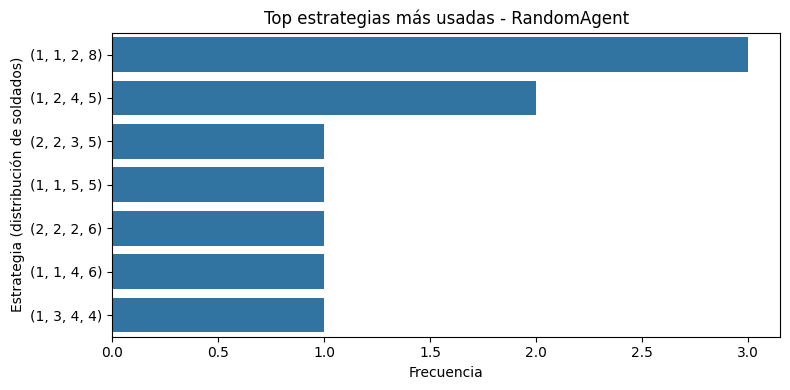

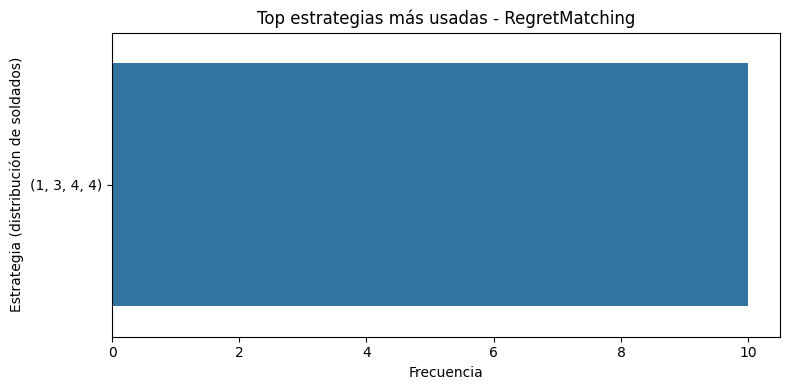

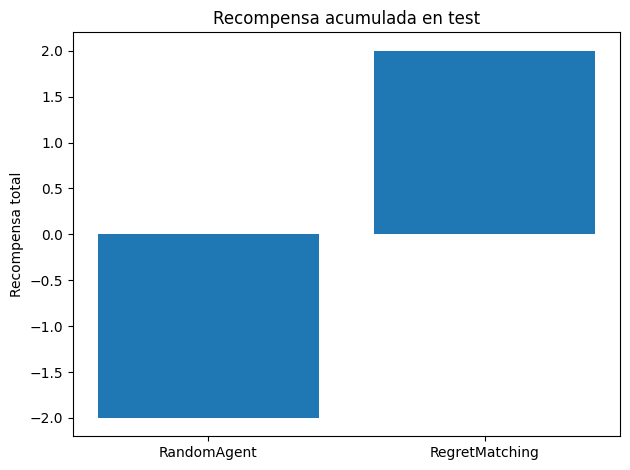

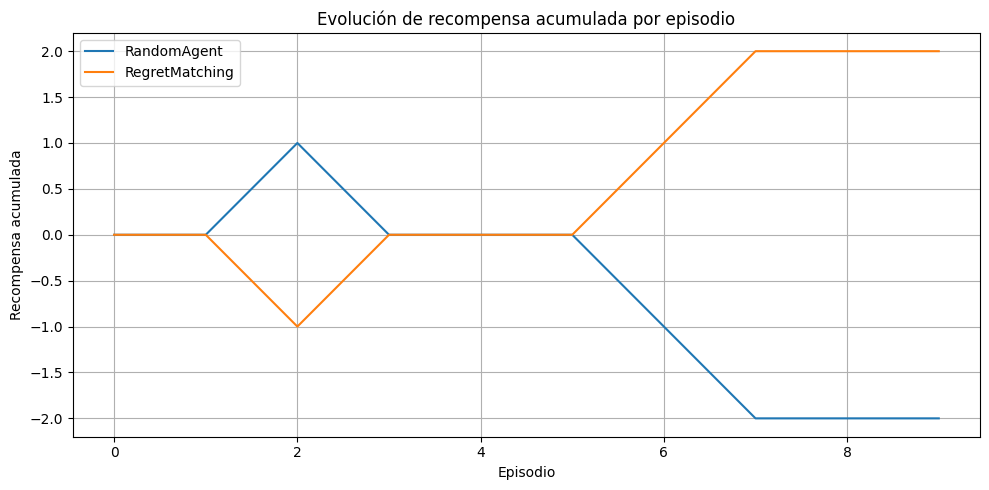

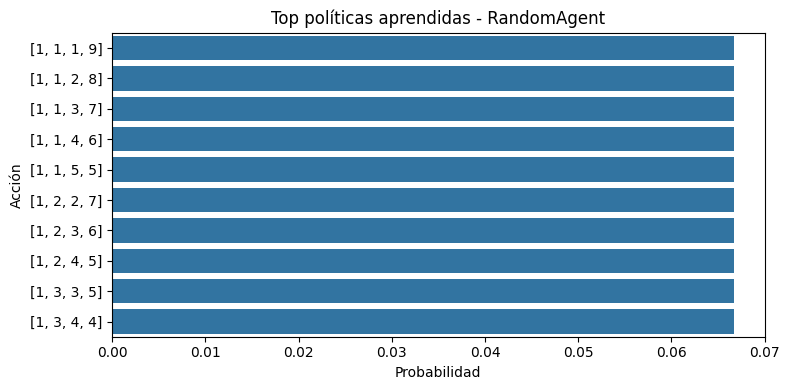

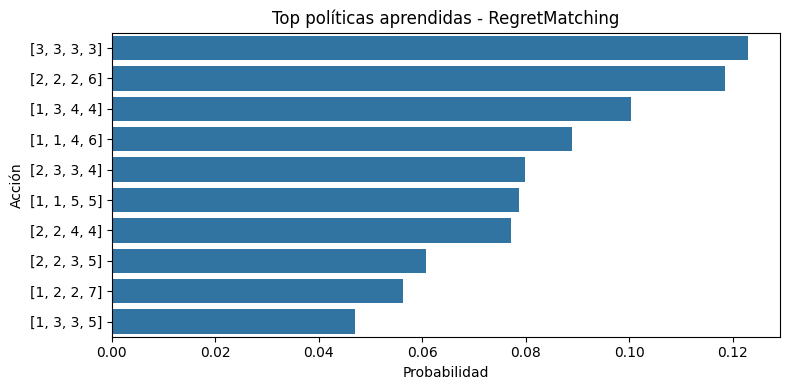

In [86]:
g.reset()

agent0 = RandomAgent(game=g, agent="agent_0")
agent1 = RegretMatching(game=g, agent="agent_1")

# Entrenamiento
defined_agents, agent_names = train_blotto(g, agent0, agent1, episodes=EPISODES)

# Congelar aprendizaje
defined_agents["agent_0"].learn = False
defined_agents["agent_1"].learn = False

# Testeo
test_blotto(g, defined_agents, agent_names, rounds=10)

----

# Save into HTML file

In [87]:
export_notebook_to_html("N-form_games.ipynb", "notebook_exports/N-form_v2.html")